### Zavrsni rad - Analiza drustvenih mreza - primer Spotify platforme

##### Uvoz potrebnih biblioteka i ucitavanje stopwordsa

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from pandas import read_csv

from my_functions import *

nltk.download("stopwords")
stopword = set(nltk.corpus.stopwords.words('english'))
spanish_stopword = set(nltk.corpus.stopwords.words('spanish'))
new_stop_words = {'ooh','yeah','hey','whoa','woah', 'ohh', 'was', 'mmm', 'oooh','yah','yeh','mmm', 'hmm','deh','doh','jah','wa', 'back','said','one', 'come','thing','get','would','like','know','go','let','cause','oh','could','got','uh','ah','lyric','outro','aslo','ay','ey','ayy','em'}

stopword=stopword.union(new_stop_words)
stopword=stopword.union(spanish_stopword)


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


##### Dodavanje potrebnih parametara za pristup Spotify i Genius aplikaciji

In [2]:
# Setting up the Spotify credentials and authentication scopes
SPOTIPY_CLIENT_ID='c7f3eaa09bd044ffa1c2ca5cdc088aec'
SPOTIPY_CLIENT_SECRET='19f099110ebc43b9808017c6f6cee192'



SPOTIPY_REDIRECT_URI='http://localhost:8888/callback'

scope = ['user-library-read','playlist-modify-public']

# Setting up the Genius API
genius = lyricsgenius.Genius('n-NvJGmw_MU_zTf4eORCJu-IUMhQwl9rCwfBWcdIUppRMjd7tp5YTJ2yh5GfJcSa')

# Authenticate the user
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_REDIRECT_URI, scope=scope))

##### Prosledjivanja linka numere na osnovu koje se zasniva analiza

In [3]:
# Set up the playlist URI or URL
song_uri = '5N3hjp1WNayUPZrA8kJmJP'

# Get the tracks in the playlist
song = sp.track(song_uri)

In [4]:
display(song)

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/74KM79TiuVKeVCqs8QtB0B'},
    'href': 'https://api.spotify.com/v1/artists/74KM79TiuVKeVCqs8QtB0B',
    'id': '74KM79TiuVKeVCqs8QtB0B',
    'name': 'Sabrina Carpenter',
    'type': 'artist',
    'uri': 'spotify:artist:74KM79TiuVKeVCqs8QtB0B'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
  

In [14]:
# tracks = pd.read_csv('top2023.csv')
# # removing excess info from the track name
# def remove_excess_info (x):
#     error_words_with_feature=["(with","(feat."]
#     error_words_with_feature_2=["[with","[feat."]
#     error_words_with_hyphen =["remaster","bonus track","recorded at"," feat. ","- edit", "- video mix","remix"]
#
#     for word in error_words_with_feature_2:
#         if word in x.lower():
#             x = x.rsplit(" [")[0]
#             break
#     for word in error_words_with_feature:
#         if word in x.lower():
#             x = x.rsplit(" (")[0]
#             break
#     print(x)
#     for word in error_words_with_hyphen:
#         if word in x.lower():
#             x = x.rsplit(" -")[0]
#
#     return x
#
#
# # Define a function to retrieve the lyrics for a track
# def get_lyrics(track_name, artist_name):
#     try:
#
#         song = genius.search_song(track_name, artist_name)
#
#
#         public_song=lyricsgenius.PublicAPI().song(song.id)["song"]
#         writers=public_song["writer_artists"]
#         producers=public_song["producer_artists"]
#
#         song_writers=[]
#         for writer in writers:
#             song_writers.append(writer["name"])
#
#         song_producers=[]
#         for producer in producers:
#             song_producers.append(producer["name"])
#
#         lyrics = song.lyrics
#         return {"lyrics":lyrics,"writers":song_writers,"producers":song_producers}
#     except Exception as error:
#         print("greska: ",error)
#         return 'No lyric found'
#
# def get_soup_selenium(url: str) -> BeautifulSoup:
#
#     driver = webdriver.Chrome()
#     driver.get(url)
#     return BeautifulSoup(driver.page_source, 'html.parser')
# def remove_rows(text):
#     text=text.replace("\n"," ")
#     return text
#
# def replace_signs(x):
#     signs=punctuation + " " + "’"
#     x =[c for c in x.lower() if not c in signs]
#     x="".join(x)
#     return x.strip()
#
#
# def remove_the(x):
#     if "The" in x[0:3]:
#         return x.replace("The","").strip()
#     if "the" in x[0:3]:
#         return x.replace("the","").strip()
#     return x
#
# def get_lyrics_selenium(track_name, artist_name):
#     try:
#         track_name=remove_excess_info(track_name)
#
#         track_name_lc=[w.strip() for w in track_name.lower().split("(") if (not "feat" in w) ]
#
#         if len(track_name_lc)>=1:
#             track_name_lc="".join(track_name_lc)
#         elif len(track_name_lc)==0:
#             track_name_lc=track_name.lower().split(" feat.",maxsplit=1)[0]
#
#         artist_name=remove_the(artist_name)
#
#         url = "https://www.azlyrics.com/lyrics/"+replace_signs(artist_name)+"/"+replace_signs(track_name_lc)+".html"
#         print(url)
#         soup = get_soup_selenium(url)
#
#         excess="<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->"
#         text =str(soup.find("div",{"class":"col-xs-12 col-lg-8 text-center"}).find("div",{"class":None,"style":None}))
#         text= text.replace("<br/>","").replace(excess,"").replace("<div>","").replace("</div>","").replace("’","'").strip()
#
#
#         return remove_rows(text.lower())
#     except:
#         return 'No lyric found (selenium)'
#
# def clean_lyrics(artist_name,track_name,lyric):
#
#     track_name = remove_excess_info(track_name)
#
#     #lyric that is retrieved contains some unnecessary information that has to be removed
#
#     if "lyrics[" in lyric:
#         lyric = lyric.split("]",maxsplit=1)
#     else:
#         lyric = lyric.split(track_name+" lyrics",maxsplit=1)
#
#     #if the lyric is retrieved, it would be split into two parts so that the second part represents the real lyric, and the excess info;
#     # if it's not, the retrieved text is either "No lyric found" or it is some unuseful text, and it wasn't split in the previous code.
#     # Because of that, web scrapping is needed to retrieve the lyric
#
#     if len(lyric)==2:
#         lyric = lyric[1]
#     else:
#         return get_lyrics_selenium(track_name,artist_name)
#
#     lyric=lyric.replace("’","'").replace("embed","").replace("\'","'")
#
#     result = re.sub(r'\[.*?\]', '', lyric)
#
#     if result[len(result)-1].isnumeric():
#         result = result.replace(result[len(result)-1],"")
#     return remove_rows(result)
#
# df = pd.DataFrame()
# #df['clean_lyrics']=tracks.apply(lambda x: clean_lyrics(x['Artist Name'].lower(),x['Track Name'].lower(),x['Lyrics'].lower()),axis=1)

In [15]:
# god = 2023
# while god >= 2010:
#     name="top"+str(god)+".csv"
#     df = pd.read_csv(name)
#     df['clean_lyrics']=df.apply(lambda x: clean_lyrics(x['Artist Name'].lower(),x['Track Name'].lower(),x['Lyrics'].lower()),axis=1)
#     df.to_csv(name,index=False)
#     god = god - 1

In [5]:
# Getting the info for the track
track_info = []
artist_id=song['artists'][0]['id']
song_id = song['id']
track_name = song['name']
artist_name = song['artists'][0]['name']

In [6]:
audio_features = sp.audio_features(song_id)

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5N3hjp1WNayUPZrA8kJmJP with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5N3hjp1WNayUPZrA8kJmJP:
 None, reason: None

##### Prikupljanje podataka o numeri

In [5]:
# Retrieving the info about audio features of the track

audio_features = sp.audio_features(song['id'])[0]

# Retrieving the lyrics via lyricsgenius library with the function get_lyrics
song_info= get_lyrics(track_name, artist_name, genius)
popularity = song['popularity']

info = {'Track Name': track_name, 'Artist Name': artist_name,"Lyrics":song_info['lyrics'],"Writers":song_info['writers'],"Producers":song_info['producers'],'Genius_ID':song_info['genius_id'],'Popularity':popularity}
info.update(audio_features)
track_info.append(info)

# Create a pandas dataframe with the track information
new_tracks = pd.DataFrame(track_info)

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5N3hjp1WNayUPZrA8kJmJP with Params: {} returned 403 due to None
HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5N3hjp1WNayUPZrA8kJmJP with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=5N3hjp1WNayUPZrA8kJmJP:
 None, reason: None

##### Prikupljanje i "ciscenje" podataka koji predstavljaju tekst numere

In [5]:
new_tracks['clean_lyrics'] = new_tracks.apply(
    lambda x: clean_lyrics(x['Artist Name'].lower(), x['Track Name'].lower(), x['Lyrics'].lower(), x['Genius_ID']),
    axis=1)

/Users/ilijadumanovic/DataspellProjects/Master thesis/my_functions.py:111: FutureWarning: Possible nested set at position 1
  result = re.sub('[[^]]*W+[^]]*]', '', lyric)


##### Odredjivanje vremenskog peioda 

In [6]:
year=int(song['album']['release_date'].split("-")[0])
last_year= year-4 if year>2009 else 2009

##### Ucitavanje skupa podataka o najpopularnijim numerama

In [6]:
god = 2023
last_year = 2024
# Initialize columns names for the new datasets
columns = ['Track Name',
           'Artist Name',
           'Lyrics',
           'Writers',
           'Producers',
           'Genius_ID',
           'danceability',
           'energy',
           'key',
           'loudness',
           'mode',
           'speechiness',
           'acousticness',
           'instrumentalness',
           'liveness',
           'valence',
           'tempo',
           'type',
           'id',
           'uri',
           'track_href',
           'analysis_url',
           'duration_ms',
           'time_signature',
           'clean_lyrics',
           'Popularity']

radius_columns = ['node radius',
                  'danceability',
                  'energy',
                  'key',
                  'loudness',
                  'mode',
                  'speechiness',
                  'acousticness',
                  'instrumentalness',
                  'liveness',
                  'valence',
                  'tempo']

normed_radius_columns = ['n_danceability',
                  'n_energy',
                  'n_key',
                  'n_loudness',
                  'n_mode',
                  'n_speechiness',
                  'n_acousticness',
                  'n_instrumentalness',
                  'n_liveness',
                  'n_valence',
                  'n_tempo']

complete_df=[]

while god >= last_year:
    if last_year == 2009:
        break
    name="top"+str(god)+".csv"
    df = pd.read_csv(name)
    df['Track Name'] = df['Track Name'].apply(remove_excess_info)
    complete_df.append(df)
    god = god-1
    
df=pd.concat(complete_df)   
df = df.sort_values('Popularity', ascending=False)
df = df.drop_duplicates(subset=['Artist Name', 'Track Name'], keep='first')
df = df.reset_index(drop=True)

df['Writers'] = df['Writers'].apply(ast.literal_eval)
df['Producers'] = df['Producers'].apply(ast.literal_eval)
df = pd.concat([df,new_tracks])
df = df.reset_index(drop=True)

ValueError: No objects to concatenate

##### Grupisanje podataka po zajednickim tekstopiscima i producentima; dobijanje skupa svih cvorova koji se nalaze u grafu - added_tracks

In [8]:
grouped_writers_df, grouped_producers_df, added_tracks = group_track_by_writer_producer(df,'all_writers','all_producers',"all_tracks",track_name)

In [78]:
grouped_writers_df = pd.read_csv("all_writers_please_please_please.csv")
grouped_writers_df['writers'] = grouped_writers_df['writers'].apply(ast.literal_eval)
grouped_writers_df['track_ids'] = grouped_writers_df['track_ids'].apply(ast.literal_eval)
grouped_producers_df = pd.read_csv("all_producers_please_please_please.csv")
grouped_producers_df['producers'] = grouped_producers_df['producers'].apply(ast.literal_eval)
grouped_producers_df['track_ids'] = grouped_producers_df['track_ids'].apply(ast.literal_eval)
added_tracks = pd.read_csv("all_tracks_please_please_please.csv",dtype={'topic': 'int'})
added_tracks['Writers'] = added_tracks['Writers'].apply(ast.literal_eval)
added_tracks['Producers'] = added_tracks['Producers'].apply(ast.literal_eval)

In [79]:
added_tracks

Track Name      Artist Name                      id  \
0                 Cruel Summer     Taylor Swift  1BxfuPKGuaTgP7aM0Bbdwr   
1                      deja vu   Olivia Rodrigo  61KpQadow081I2AsbeLcsb   
2                       august     Taylor Swift  3hUxzQpSfdDqwM3ZTFQY0K   
3                    Anti-Hero     Taylor Swift  0V3wPSX9ygBnCm8psDIegu   
4                        Karma     Taylor Swift  7KokYm8cMIXCsGVmUvKtqf   
..                         ...              ...                     ...   
293           When You're Gone     Shawn Mendes  0U1W2LZVUX7qTm7dDpqxh6   
294                  Escapism.             RAYE  5WxVXxCMRnvxUKFq40ELwq   
295  RITMO (Bad Boys For Life)  Black Eyed Peas  4NCsrTzgVfsDo8nWyP8PPc   
296                       Rush      Troye Sivan  3xIMkM5LgbVDkpO74O3Np3   
297           SKIN OF MY TEETH      Demi Lovato  1O9AseW10CTi6nBLoj0O6K   

                                      uri  danceability  energy  key  \
0    spotify:track:1BxfuPKGuaTgP7aM0Bbdwr         0.552   0.702    9   
1    spotify:track:61KpQadow081I2AsbeLcsb         0.439   0.610    9   
2    spotify:track:3hUxzQpSfdDqwM3ZTFQY0K         0.532   0.623    5   
3    spotify:track:0V3wPSX9ygBnCm8psDIegu         0.633   0.648    4   
4    spotify:track:7KokYm8cMIXCsGVmUvKtqf         0.640   0.619    8   
..                                    ...           ...     ...  ...   
293  spotify:track:0U1W2LZVUX7qTm7dDpqxh6         0.603   0.691    5   
294  spotify:track:5WxVXxCMRnvxUKFq40ELwq         0.538   0.742    2   
295  spotify:track:4NCsrTzgVfsDo8nWyP8PPc         0.723   0.704   10   
296  spotify:track:3xIMkM5LgbVDkpO74O3Np3         0.728   0.841   10   
297  spotify:track:1O9AseW10CTi6nBLoj0O6K         0.458   0.947   11   

     loudness  mode  speechiness  ...  \
0      -5.707     1       0.1570  ...   
1      -7.236     1       0.1160  ...   
2      -9.208     1       0.0331  ...   
3      -6.645     1       0.0620  ...   
4      -7.108     1       0.0650  ...   
..        ...   ...          ...  ...   
293    -5.805     1       0.0372  ...   
294    -5.355     1       0.1140  ...   
295    -7.088     0       0.0571  ...   
296    -7.682     0       0.0567  ...   
297    -2.308     0       0.2210  ...   

                                          clean_lyrics  \
0     (yeah, yeah, yeah, yeah)   killing me slow, o...   
1     car rides to malibu strawberry ice cream, one...   
2     salt air, and the rust on your door i never n...   
3     i have this thing where i get older, but just...   
4     you're talking shit for the hell of it addict...   
..                                                 ...   
293   you never know how good you have it, oh-oh un...   
294   sleazin' and teasin', i'm sittin' on him all ...   
295   this is the rhythm, rhythm, rhythm, rhythm th...   
296   i feel the rush addicted to your touch   you ...   
297   demi leaves rehab again when is this shit gon...   

                                                Lyrics  Genius_ID  \
0    214 ContributorsTranslationsTürkçeEspañolСрпск...    4712978   
1    244 ContributorsTranslationsTürkçeSvenskaEspañ...    6649389   
2    166 ContributorsTranslationsNederlandsTürkçeEs...    5793977   
3    206 ContributorsTranslationsPortuguêsEspañolTü...    8434253   
4    120 ContributorsTranslationsPortuguêsСрпскиEsp...    8485918   
..                                                 ...        ...   
293  67 ContributorsTranslationsItalianoPortuguêsTü...    7800414   
294  89 ContributorsTranslationsTürkçeEspañolPortug...    8427758   
295  47 ContributorsTranslationsEspañolPortuguêsEng...    4934707   
296  63 ContributorsTranslationsEspañolPortuguêsFra...    9214904   
297  60 ContributorsTranslationsNederlandsTiếng Việ...    7643717   

                                               Writers  \
0           [St. Vincent, Jack Antonoff, Taylor Swift]   
1    [St. Vincent, Taylor Swift, Jack Antonoff, Oli...   
2                        [Jack Antonoff, Taylor Swift]   
3  

#### NLP

In [80]:
vectorizer=TfidfVectorizer(stop_words=list(stopword), min_df=0.1)
tfidf= vectorizer.fit_transform(added_tracks["clean_lyrics"])

In [81]:
number_of_topics = 4
nmf = NMF(n_components=number_of_topics)
topic_values = nmf.fit_transform(tfidf)

['wanna',
 'say',
 'bitch',
 'night',
 'make',
 'see',
 'want',
 'fuck',
 'never',
 'shit',
 'keep',
 'time',
 'right',
 'way',
 'need',
 'look',
 'feel',
 'good',
 'huh',
 'girl']

['baby',
 'bad',
 'hold',
 'tell',
 'boy',
 'heart',
 'better',
 'need',
 'keep',
 'good',
 'put',
 'world',
 'even',
 'right',
 'us',
 'say',
 'around',
 'everything',
 'girl',
 'left']

['might',
 'also',
 'tickets',
 'liveget',
 'never',
 'low',
 'see',
 'mind',
 'try',
 'head',
 'made',
 'eyes',
 'feel',
 'two',
 'even',
 'world',
 'still',
 'time',
 'make',
 'give']

['love',
 'want',
 'way',
 'always',
 'still',
 'even',
 'try',
 'us',
 'tell',
 'need',
 'everything',
 'see',
 'every',
 'made',
 'leave',
 'better',
 'make',
 'head',
 'hold',
 'say']

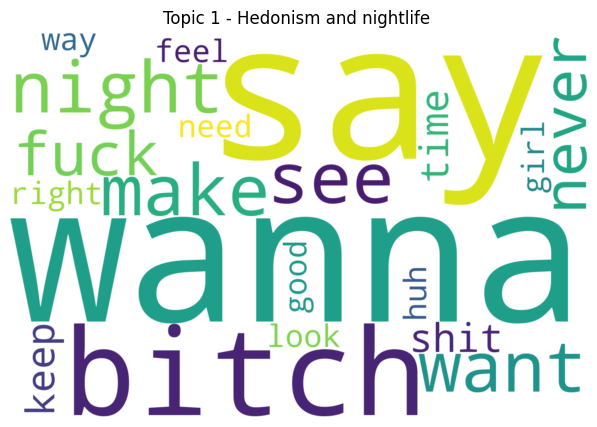

<Figure size 640x480 with 0 Axes>

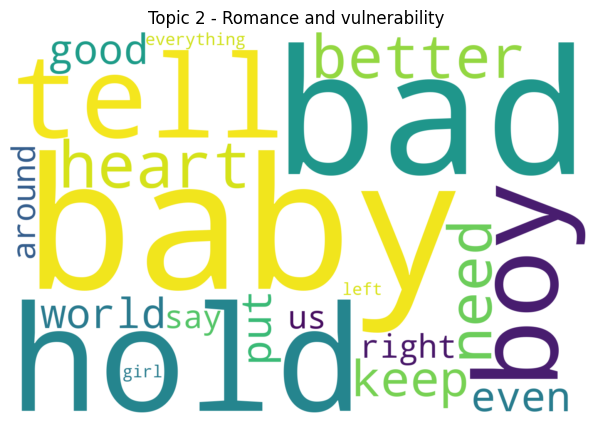

<Figure size 640x480 with 0 Axes>

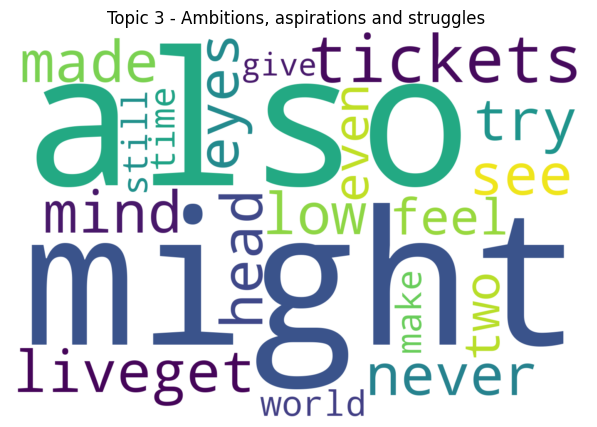

<Figure size 640x480 with 0 Axes>

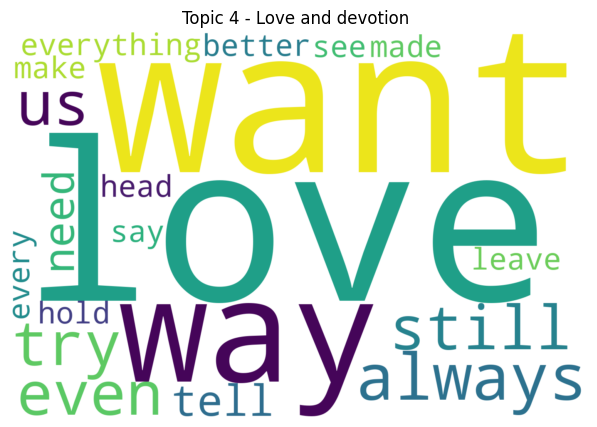

<Figure size 640x480 with 0 Axes>

In [133]:
feature_names = vectorizer.get_feature_names_out()

topic_words = []
for topic_idx, topic in enumerate(nmf.components_):
    top_words_idx = topic.argsort()[:-21:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    display(top_words)
    topic_words.append(top_words)

#Prepare word frequencies
for i, words in enumerate(topic_words):
    word_frequencies = {word: i+1 for word in words}

    # Generate word cloud
    wordcloud = WordCloud(width=1500, height=1000, background_color='white').generate_from_frequencies(word_frequencies)
    topics = ['Hedonism and nightlife','Romance and vulnerability','Ambitions, aspirations and struggles','Love and devotion']
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {i+1} - {topics[i]} ")
    plt.axis('off')
    plt.show()
    
    plt.savefig(f"wordcloud_topic_{i+1}_{topics[i]}.pdf",dpi=600)
    plt.savefig(f"wordcloud_topic_{i+1}_{topics[i]}.svg",dpi=600)
    plt.savefig(f"wordcloud_topic_{i+1}_{topics[i]}.png",dpi=600)
    

##### Prepoznavanje najdominantnije teme u numeri i kreiranje kolone "topic" u skupu added_tracks koja oznacava dominantnu temu

In [83]:
topic_values = pd.DataFrame(topic_values)
topic_values['topic'] = topic_values.idxmax(axis=1)

In [84]:
added_tracks=pd.concat([added_tracks,topic_values['topic']],axis=1)

In [85]:
all_name = "all_tracks_"+str(track_name.replace(" ","_").lower()+".csv")
added_tracks.to_csv(all_name,index=False)

In [86]:
added_tracks2 = added_tracks.copy()

In [87]:
added_tracks2.columns

Index(['Track Name', 'Artist Name', 'id', 'uri', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'Popularity', 'clean_lyrics', 'Lyrics', 'Genius_ID', 'Writers',
       'Producers', 'topic', 'topic.1', 'topic.2', 'topic.3', 'topic.4',
       'topic'],
      dtype='object')

In [88]:
added_tracks2

Track Name      Artist Name                      id  \
0                 Cruel Summer     Taylor Swift  1BxfuPKGuaTgP7aM0Bbdwr   
1                      deja vu   Olivia Rodrigo  61KpQadow081I2AsbeLcsb   
2                       august     Taylor Swift  3hUxzQpSfdDqwM3ZTFQY0K   
3                    Anti-Hero     Taylor Swift  0V3wPSX9ygBnCm8psDIegu   
4                        Karma     Taylor Swift  7KokYm8cMIXCsGVmUvKtqf   
..                         ...              ...                     ...   
293           When You're Gone     Shawn Mendes  0U1W2LZVUX7qTm7dDpqxh6   
294                  Escapism.             RAYE  5WxVXxCMRnvxUKFq40ELwq   
295  RITMO (Bad Boys For Life)  Black Eyed Peas  4NCsrTzgVfsDo8nWyP8PPc   
296                       Rush      Troye Sivan  3xIMkM5LgbVDkpO74O3Np3   
297           SKIN OF MY TEETH      Demi Lovato  1O9AseW10CTi6nBLoj0O6K   

                                      uri  danceability  energy  key  \
0    spotify:track:1BxfuPKGuaTgP7aM0Bbdwr         0.552   0.702    9   
1    spotify:track:61KpQadow081I2AsbeLcsb         0.439   0.610    9   
2    spotify:track:3hUxzQpSfdDqwM3ZTFQY0K         0.532   0.623    5   
3    spotify:track:0V3wPSX9ygBnCm8psDIegu         0.633   0.648    4   
4    spotify:track:7KokYm8cMIXCsGVmUvKtqf         0.640   0.619    8   
..                                    ...           ...     ...  ...   
293  spotify:track:0U1W2LZVUX7qTm7dDpqxh6         0.603   0.691    5   
294  spotify:track:5WxVXxCMRnvxUKFq40ELwq         0.538   0.742    2   
295  spotify:track:4NCsrTzgVfsDo8nWyP8PPc         0.723   0.704   10   
296  spotify:track:3xIMkM5LgbVDkpO74O3Np3         0.728   0.841   10   
297  spotify:track:1O9AseW10CTi6nBLoj0O6K         0.458   0.947   11   

     loudness  mode  speechiness  ...  \
0      -5.707     1       0.1570  ...   
1      -7.236     1       0.1160  ...   
2      -9.208     1       0.0331  ...   
3      -6.645     1       0.0620  ...   
4      -7.108     1       0.0650  ...   
..        ...   ...          ...  ...   
293    -5.805     1       0.0372  ...   
294    -5.355     1       0.1140  ...   
295    -7.088     0       0.0571  ...   
296    -7.682     0       0.0567  ...   
297    -2.308     0       0.2210  ...   

                                                Lyrics  Genius_ID  \
0    214 ContributorsTranslationsTürkçeEspañolСрпск...    4712978   
1    244 ContributorsTranslationsTürkçeSvenskaEspañ...    6649389   
2    166 ContributorsTranslationsNederlandsTürkçeEs...    5793977   
3    206 ContributorsTranslationsPortuguêsEspañolTü...    8434253   
4    120 ContributorsTranslationsPortuguêsСрпскиEsp...    8485918   
..                                                 ...        ...   
293  67 ContributorsTranslationsItalianoPortuguêsTü...    7800414   
294  89 ContributorsTranslationsTürkçeEspañolPortug...    8427758   
295  47 ContributorsTranslationsEspañolPortuguêsEng...    4934707   
296  63 ContributorsTranslationsEspañolPortuguêsFra...    9214904   
297  60 ContributorsTranslationsNederlandsTiếng Việ...    7643717   

                                               Writers  \
0           [St. Vincent, Jack Antonoff, Taylor Swift]   
1    [St. Vincent, Taylor Swift, Jack Antonoff, Oli...   
2                        [Jack Antonoff, Taylor Swift]   
3                        [Taylor Swift, Jack Antonoff]   
4    [Taylor Swift, Jack Antonoff, Jahaan Sweet, Ke...   
..                                                 ...   
293            [Scott Harris, Jonah Shy, Shawn Mendes]   
294                     [RAYE, Mike Sabath, 070 Shake]   
295  [Lee Marrow, Peter Glenister, Michael Gaffey, ...   
296  [Troye Sivan, Leland, Alex Chapman, Styalz Fue...   
297  [OAK, Keith Sorrells, Laura Veltz, lil aaron, ...   

                                             Producers  topic topic.1 topic.2  \
0                        [Taylor Swift, Jack Antonoff]      0       0       0   
1                                          [Dan Nigro]      3       3    

In [89]:
import numpy as np
min = added_tracks2['Popularity'].min()
max = added_tracks2['Popularity'].max()

added_tracks2['Popularity'] = added_tracks2['Popularity'].apply(lambda x: (x-min)/(max-min))

In [90]:
def plot_graph2(G,topic=False, layout = None):
    rgb_colors = ['#F6511D','#FFB400','#00A6ED','#7FB800','#0D2C54']
    plt.figure(figsize=(20, 12))
    edges = G.edges()
    nodes = G.nodes()
    edge_colors = [G[u][v]['color'] for u,v in edges]
    if topic:
        node_colors = [rgb_colors[G.nodes[node]['topic']] for node in nodes]
    else:
        node_colors = [G.nodes[node]['color'] for node in nodes]
    size = [float(G.nodes[u]['popularity'])*500 for u in nodes]
    legend_labels = ['Writer', 'Producer', 'Writer & Producer']
    legend_colors = ['blue', 'brown', 'green']
    legend_markers = [plt.Line2D([0], [0], marker='_', color=color, markerfacecolor=color, markersize=20) for color in
                      legend_colors]
    plt.legend(legend_markers, legend_labels, loc='lower right', fontsize='large', frameon=True, borderpad=1,
               borderaxespad=1)
    if layout:
        nx.draw(G, labels=nx.get_node_attributes(G, 'title'), width=2, edge_color=edge_colors, alpha=0.5,
                with_labels=False, node_color=node_colors, node_size=size, font_weight='bold',pos=layout)
    else:
        nx.draw(G, labels=nx.get_node_attributes(G, 'title'), width=2, edge_color=edge_colors, alpha=0.5,
                with_labels=False, node_color=node_colors, node_size=size, font_weight='bold')

In [ ]:
graf = create_graph(added_tracks2,grouped_writers_df, grouped_producers_df,song_id)
plot_graph2(graf,True,nx.kamada_kawai_layout(graf))

#### Vizualizacija pocetnog grafa nastalog pomocu skupa added_tracks, grouped_writers_df i grouped_producers_df; odredjivanje mera centralnosti i analiza grafa

In [ ]:
G = create_graph(added_tracks, grouped_writers_df, grouped_producers_df,song_id)
plot_graph(G,True, nx.kamada_kawai_layout(G))

In [ ]:
plot_graph(G,True, nx.kamada_kawai_layout(G))

In [102]:
nx.is_connected(G)

False

##### Odredjivanje mera centralnosti i njihova analiza

In [94]:
sub_tracks=centrality_measuers(added_tracks,G)

In [95]:
sub_tracks

id                 Track Name      Artist Name  \
0    1BxfuPKGuaTgP7aM0Bbdwr               Cruel Summer     Taylor Swift   
1    61KpQadow081I2AsbeLcsb                    deja vu   Olivia Rodrigo   
2    3hUxzQpSfdDqwM3ZTFQY0K                     august     Taylor Swift   
3    0V3wPSX9ygBnCm8psDIegu                  Anti-Hero     Taylor Swift   
4    7KokYm8cMIXCsGVmUvKtqf                      Karma     Taylor Swift   
..                      ...                        ...              ...   
293  0U1W2LZVUX7qTm7dDpqxh6           When You're Gone     Shawn Mendes   
294  5WxVXxCMRnvxUKFq40ELwq                  Escapism.             RAYE   
295  4NCsrTzgVfsDo8nWyP8PPc  RITMO (Bad Boys For Life)  Black Eyed Peas   
296  3xIMkM5LgbVDkpO74O3Np3                       Rush      Troye Sivan   
297  1O9AseW10CTi6nBLoj0O6K           SKIN OF MY TEETH      Demi Lovato   

                                             Producers  \
0                        [Taylor Swift, Jack Antonoff]   
1                                          [Dan Nigro]   
2             [Joe Alwyn, Taylor Swift, Jack Antonoff]   
3                        [Jack Antonoff, Taylor Swift]   
4    [Sounwave, Jack Antonoff, Keanu Beats, Taylor ...   
..                                                 ...   
293            [Shawn Mendes, Scott Harris, Jonah Shy]   
294                                      [Mike Sabath]   
295                          [Keith Harris, will.i.am]   
296                     [Styalz Fuego, NOVODOR, Zhone]   
297               [OAK, Keith Sorrells, Alex Niceforo]   

                                               Writers  Popularity  Degree  \
0           [St. Vincent, Jack Antonoff, Taylor Swift]        92.0      15   
1    [St. Vincent, Taylor Swift, Jack Antonoff, Oli...        11.0      24   
2                        [Jack Antonoff, Taylor Swift]        86.0      15   
3                        [Taylor Swift, Jack Antonoff]        84.0      15   
4    [Taylor Swift, Jack Antonoff, Jahaan Sweet, Ke...        80.0      21   
..                                                 ...         ...     ...   
293            [Scott Harris, Jonah Shy, Shawn Mendes]        70.0       6   
294                     [RAYE, Mike Sabath, 070 Shake]         3.0       2   
295  [Lee Marrow, Peter Glenister, Michael Gaffey, ...        46.0       3   
296  [Troye Sivan, Leland, Alex Chapman, Styalz Fue...        30.0       1   
297  [OAK, Keith Sorrells, Laura Veltz, lil aaron, ...        39.0       3   

     Closeness  Betweenness     Eigen  
0     0.281482     0.000398  0.074037  
1     0.286567     0.047591  0.079344  
2     0.281482     0.000398  0.074037  
3     0.281482     0.000398  0.074037  
4     0.331685     0.034167  0.121006  
..         ...          ...       ...  
293   0.293109     0.000000  0.015956  
294   0.257801     0.000382  0.005015  
295   0.254156     0.000000  0.003056  
296   0.219236     0.000000  0.000706  
297   0.206320     0.000000  0.000320  

[298 rows x 10 columns]

In [96]:
sub_tracks[['Degree','Closeness','Betweenness','Eigen']].describe()

Degree   Closeness  Betweenness         Eigen
count  298.000000  298.000000   298.000000  2.980000e+02
mean     9.812081    0.265376     0.007688  3.828779e-02
std      6.507048    0.070142     0.012709  4.354437e-02
min      1.000000    0.003367     0.000000  7.070408e-67
25%      4.000000    0.246772     0.000000  5.267761e-03
50%      9.000000    0.281776     0.001909  1.809660e-02
75%     14.000000    0.307130     0.009722  6.265675e-02
max     37.000000    0.365393     0.083500  2.808779e-01

Shapiro-Wilk test for Degree:
Statistic: 0.9488
p-value: 1.122919342030988e-08
Not normal

Shapiro-Wilk test for Closeness:
Statistic: 0.7551
p-value: 9.66406433952552e-21
Not normal

Shapiro-Wilk test for Betweenness:
Statistic: 0.6562
p-value: 4.071912659871827e-24
Not normal

Shapiro-Wilk test for Eigen:
Statistic: 0.8166
p-value: 4.4611356830852766e-18
Not normal



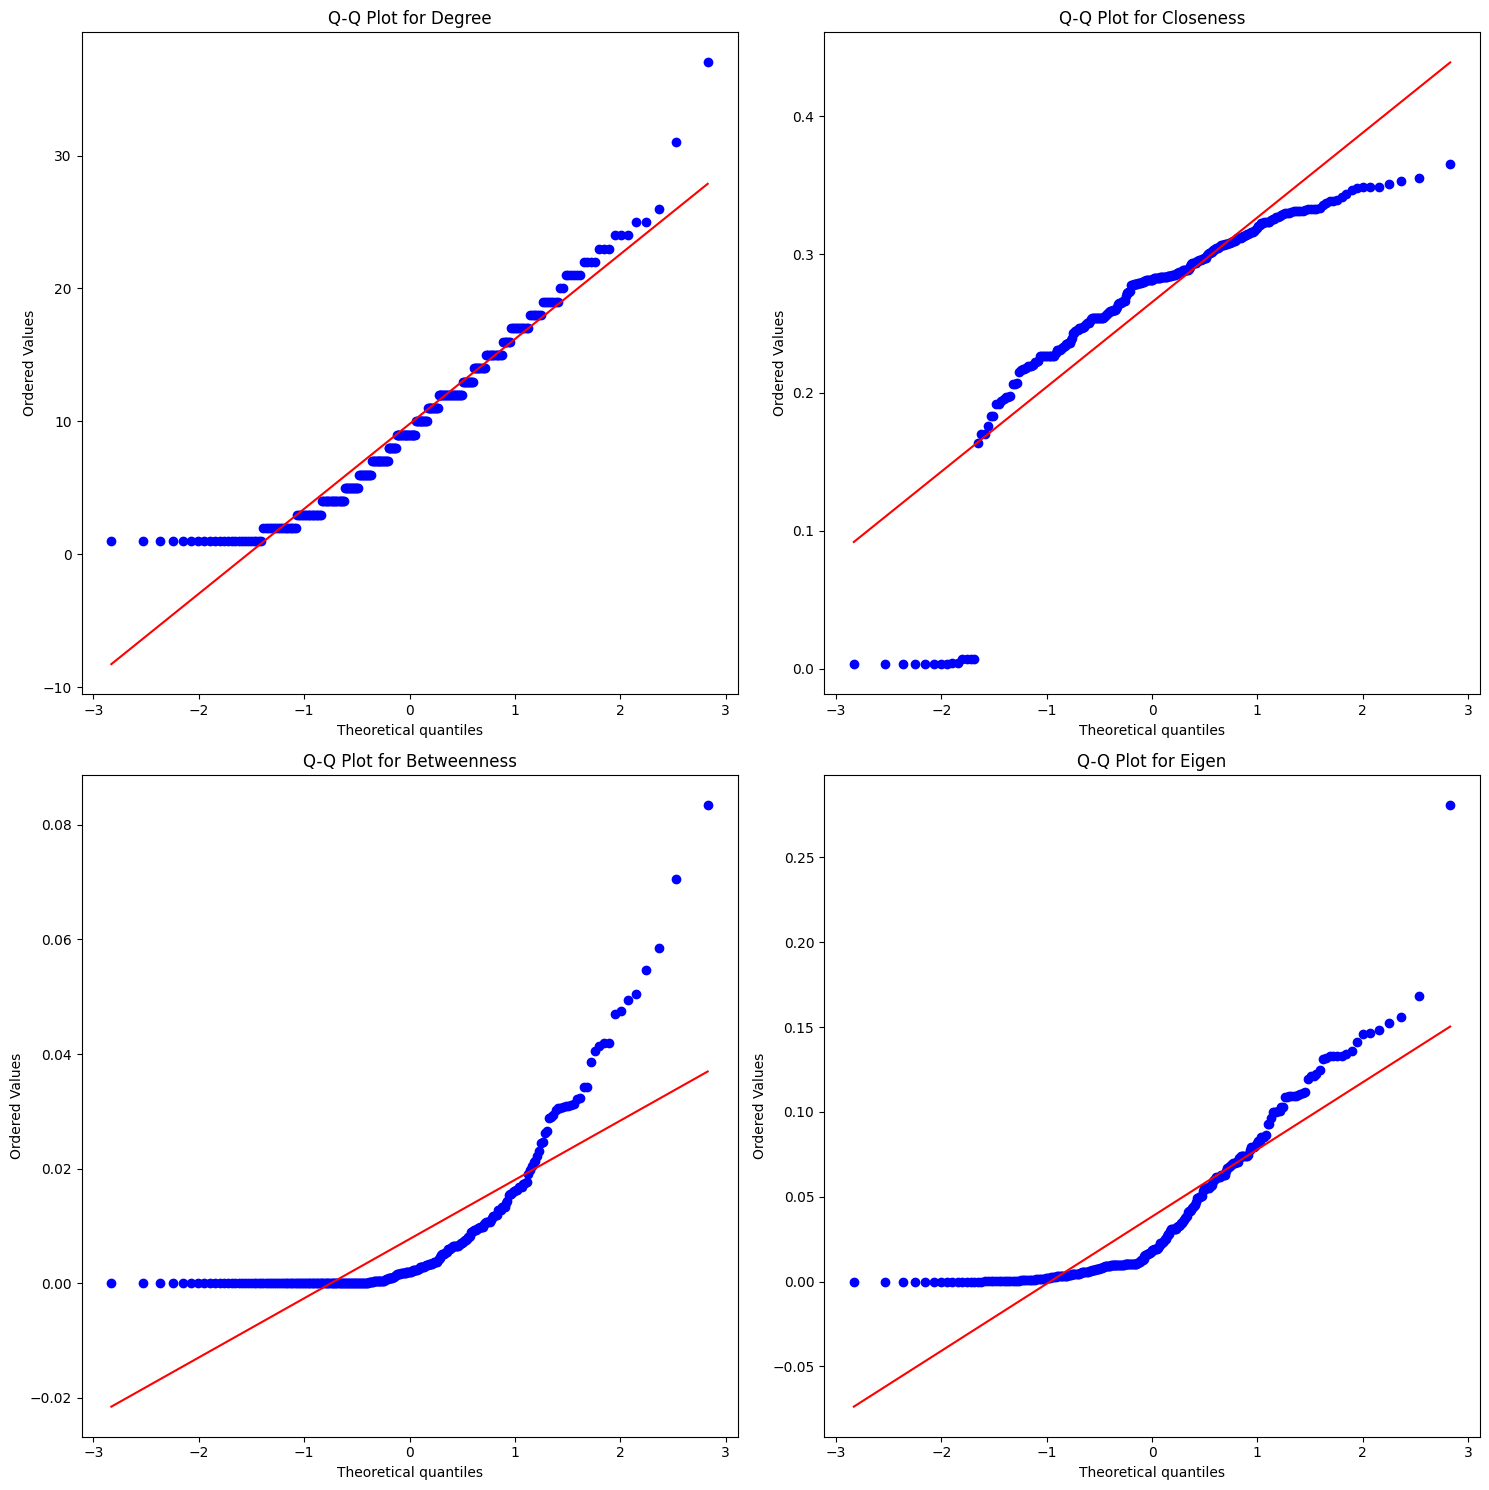

In [97]:
columns_to_test = ['Degree', 'Closeness', 'Betweenness', 'Eigen']

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.ravel()

# Perform Shapiro-Wilk test
for i, column in enumerate(columns_to_test):
    statistic, p_value = stats.shapiro(sub_tracks[column])
    print(f"Shapiro-Wilk test for {column}:")
    print(f"Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:}")
    print("Normal" if p_value > 0.05 else "Not normal")
    print()
    
    stats.probplot(sub_tracks[column], dist="norm", plot=axs[i])
    axs[i].set_title(f"Q-Q Plot for {column}")

plt.tight_layout()
plt.show()

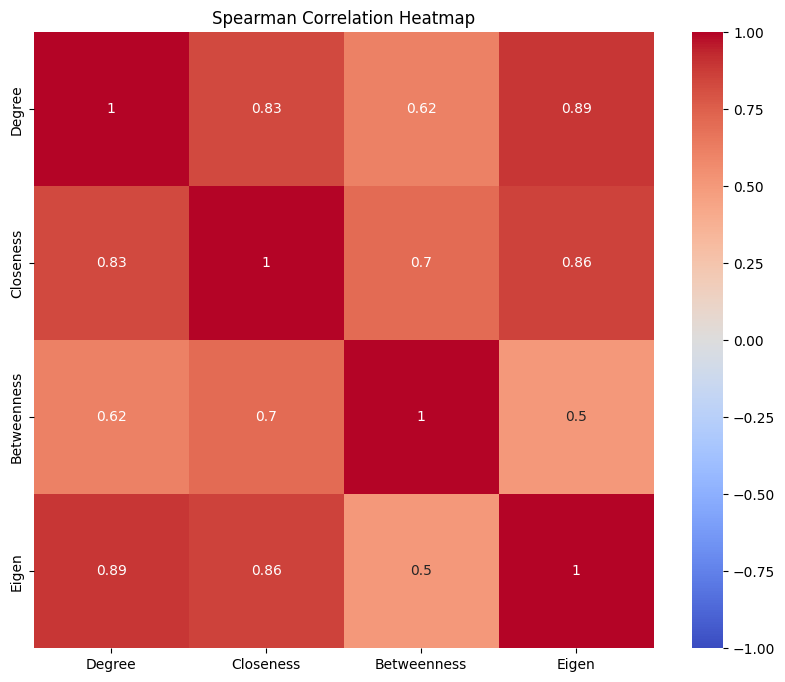

In [98]:
correlation_matrix = sub_tracks.loc[:,"Degree":].corr(method='spearman')

# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

##### Provera prisustva homofilije u grafu na osnovu atributa "topic"

In [ ]:
community_assortativity = nx.assortativity.attribute_assortativity_coefficient(G,'topic')
community_assortativity

##### Odredjivanje koje numere su na osnovu audio komponente najslicnije numeri koju analiziramo koriscenjem euklidskog rastojanja

In [ ]:
most_similar_songs = calculate_euclidian_distance(added_tracks, new_tracks)
pd.concat([added_tracks[['Track Name','Artist Name','id']].set_index('id'),most_similar_songs.set_index('id')],axis=1).sort_values('distance').head(10)

In [110]:
most_similar = calculate_euclidian_distance(added_tracks, new_tracks, True)

##### Najkraci put od nase numere do njoj najslicnije

In [111]:
print_shortest_path(G,song_id,most_similar['id'])

The furthest distance from Please Please Please is: Beautiful Mistakes

Please Please Please -> ['Amy Allen'] -> On The Ground
On The Ground -> ['Jon Bellion'] -> Memories
Memories -> ['Adam Levine', 'Jacob Kasher'] -> Beautiful Mistakes
_______________________________________________________


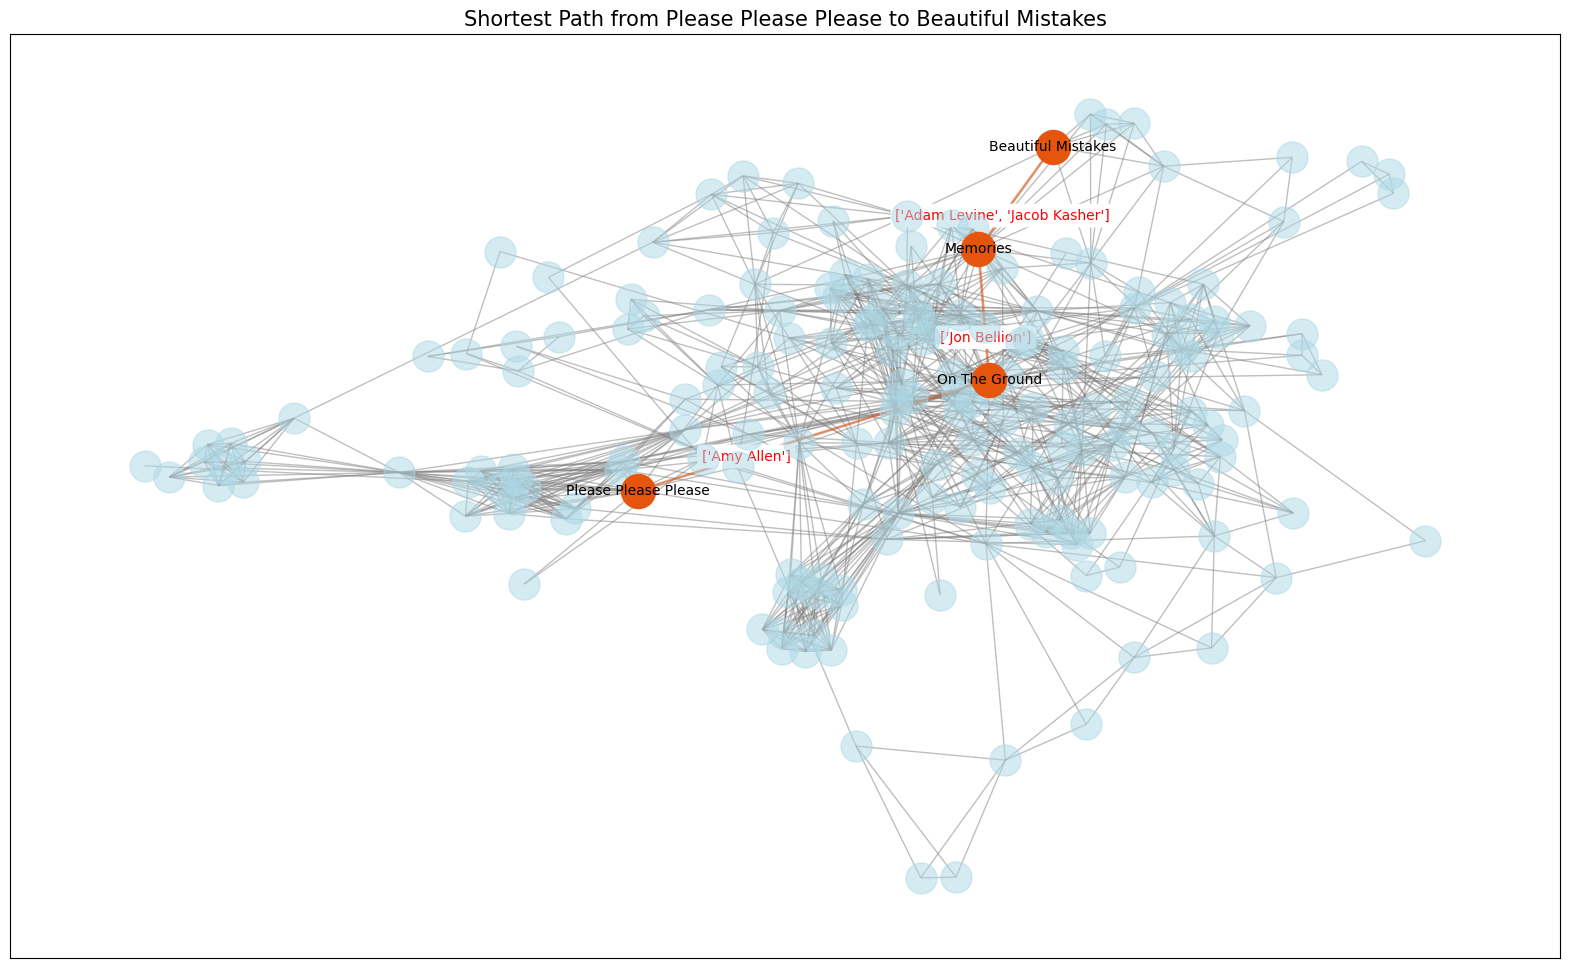

In [112]:
plot_graph_with_shortest_path(nx.ego_graph(G,song_id,3),song_id,most_similar['id'])

##### Odredjivanje putanje do numere koja je najudaljenija na osnovu rastojanja

In [ ]:
least_similar = calculate_euclidian_distance(added_tracks, new_tracks, True,True)
print_shortest_path(G, song_id, least_similar['id'])
plot_graph_with_shortest_path(nx.ego_graph(G, song_id, 4), song_id, least_similar['id'])

#### ZAJEDNICE

##### Odredjivanja zajednica i modulartnosti primenom razlicitih metoda

In [102]:
seed(123)
communities_generator = nx.community.girvan_newman(G)

top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

modularity_value = nx.community.modularity(G, next_level_communities)

print("Modularity:", modularity_value)
print("Communities:", top_level_communities)
print("Number of communities:", len(top_level_communities))

Modularity: 0.09270520722373762
Communities: ({'40uMIn2zJLAQhNXghRjBed', '0VjIjW4GlUZAMYd2vXMi3b', '5JqZ3oqF00jkT81foAFvqg', '6UelLqGlWMcVH1E5c4H7lY', '4sx6NRwL6Ol3V6m9exwGlQ', '6iF4RgIjDvDqyW13PezSj3', '5AqiaZwhmC6dIbgWrD5SzV', '22LAwLoDA5b4AaGSkg6bKW', '4xhsWYTOGcal8zt0J161CU', '609E1JCInJncactoMmkDon', '27NovPIUIRrOZoCHxABJwK', '5MMW4CZsZiZt2iuqAXzzWC', '5N3hjp1WNayUPZrA8kJmJP', '2DB4DdfCFMw1iaR6JaR03a', '2JPLbjOn0wPCngEot2STUS', '6WrI0LAC5M1Rw2MnX2ZvEg', '3VqeTFIvhxu3DIe4eZVzGq', '6jRq8gaZhMUyy5RclRPcAf', '7MAibcTli4IisCtbHKrGMh', '0e8nrvls4Qqv5Rfa2UhqmO', '3eekarcy7kvN4yt5ZFzltW', '5u1n1kITHCxxp8twBcZxWy', '0U1W2LZVUX7qTm7dDpqxh6', '5SWnsxjhdcEDc7LJjq9UHk', '3hUxzQpSfdDqwM3ZTFQY0K', '0WSEq9Ko4kFPt8yo3ICd6T', '7AzlLxHn24DxjgQX73F9fU', '079Ey5uxL04AKPQgVQwx5h', '2i8f4VnnBjy0yDqH2C452a', '5ww2BF9slyYgNOk37BlC4u', '0z8hI3OPS8ADPWtoCjjLl6', '39Yp9wwQiSRIDOvrVg7mbk', '5CZ40GBx1sQ9agT82CLQCT', '7dSZ6zGTQx66c2GF91xCrb', '2FeBslNBMdR9V58uv6hd2t', '7dJYggqjKo71KI9sLzqCs8', '3BKD1PwArikchz2Z

In [103]:
seed(123)
partition = community_louvain.best_partition(G)

modularity_value = community_louvain.modularity(partition, G)

print("Communities:", partition)
print("Modularity:", modularity_value)

print("Number of communities:", len(set(partition.values())))

Communities: {'1BxfuPKGuaTgP7aM0Bbdwr': 0, '61KpQadow081I2AsbeLcsb': 0, '3hUxzQpSfdDqwM3ZTFQY0K': 0, '0V3wPSX9ygBnCm8psDIegu': 0, '7KokYm8cMIXCsGVmUvKtqf': 0, '1Iq8oo9XkmmvCQiGOfORiz': 0, '5jQI2r1RdgtuT8S3iG8zFC': 0, '3rWDp9tBPQR9z6U5YyRSK4': 0, '1wtOxkiel43cVs0Yux5Q4h': 0, '3KdoeNlEN0BoAKWzaRLNZa': 0, '5N3hjp1WNayUPZrA8kJmJP': 0, '5enxwA8aAbwZbf5qCHORXi': 0, '3CeCwYWvdfXbZLXFhBrbnf': 0, '0lx2cLdOt3piJbcaXIV74f': 0, '4P9Q0GojKVXpRTJCaL3kyy': 0, '4LEK9rD7TWIG4FCL1s27XC': 0, '4Dvkj6JhhA12EX05fT7y2e': 6, '6UelLqGlWMcVH1E5c4H7lY': 6, '3jjujdWJ72nww5eGnfs2E7': 6, '1qEmFfgcLObUfQm0j1W2CK': 6, '5KCbr5ndeby4y4ggthdiAb': 6, '0yLdNVWF3Srea0uzk55zFn': 6, '2KslE17cAJNHTsI2MI0jb2': 6, '7x9aauaA9cu6tyfpHnqDLo': 6, '4iJyoBOLtHqaGxP12qzhQI': 6, '5w40ZYhbBMAlHYNDaVJIUu': 6, '72yP0DUlWPyH8P7IoxskwN': 6, '4u4NyuceXP7Uzh7XFJKCr1': 6, '31qCy5ZaophVA81wtlwLc4': 6, '5JqZ3oqF00jkT81foAFvqg': 6, '27ycaQnQAxaPiyeg3nr2aB': 6, '3nqQXoyQOWXiESFLlDF1hG': 2, '7oDd86yk8itslrA9HRP2ki': 3, '4sx6NRwL6Ol3V6m9exwGlQ': 2, 

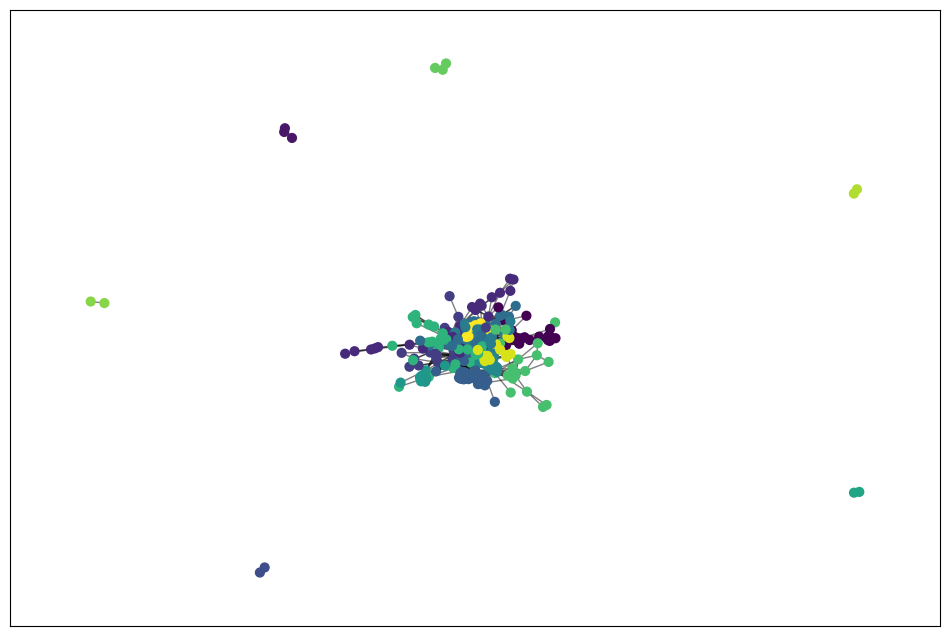

In [104]:
# Draw the graph with nodes colored by their community
pos = nx.spring_layout(G) 
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Number of communities: 31
Modularity: 0.6568653962396205


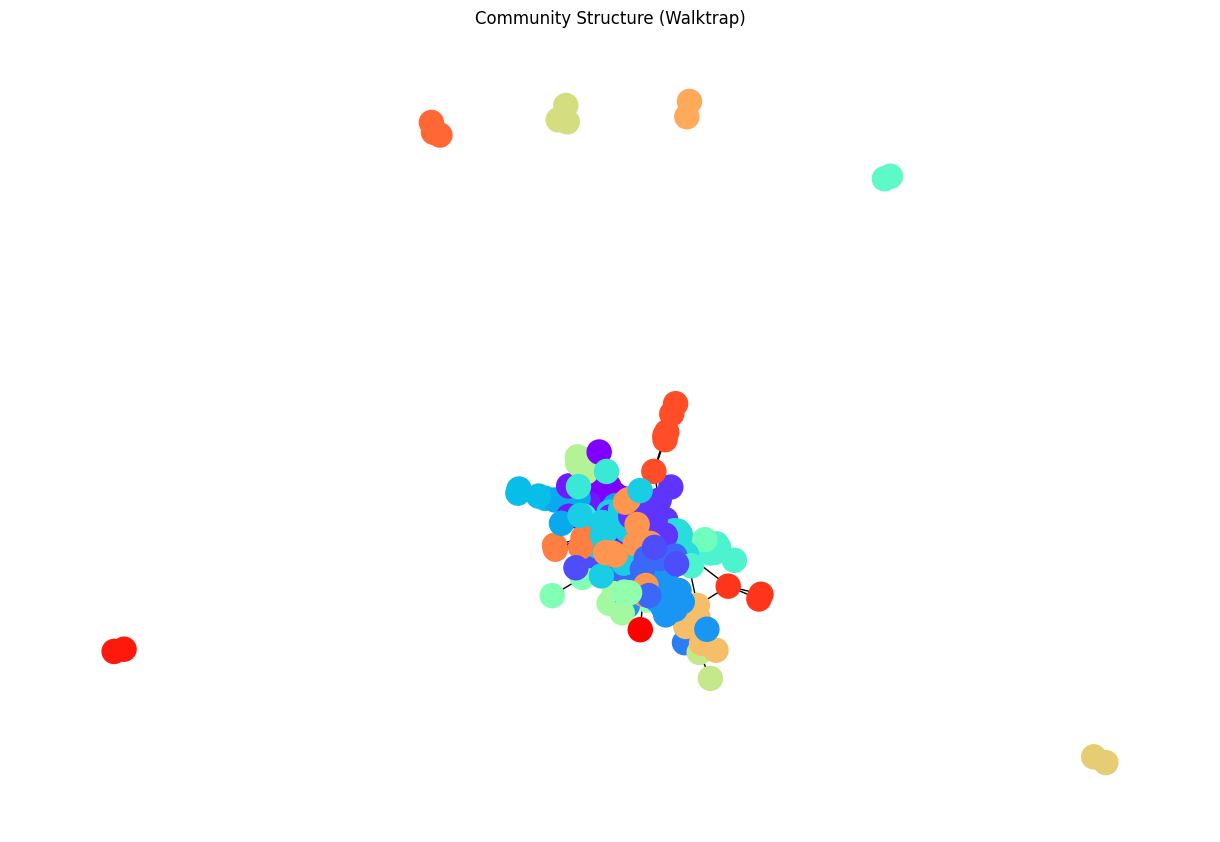

In [105]:
G_ig = ig.Graph.from_networkx(G)

walktrap_communities = G_ig.community_walktrap(steps=4) 
communities = walktrap_communities.as_clustering()

modularity = communities.modularity

community_dict = {}
for i, community in enumerate(communities):
    for node in community:
        community_dict[G_ig.vs[node]['_nx_name']] = i

print(f"Number of communities: {len(communities)}")
print(f"Modularity: {modularity}")


pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_color=[community_dict[node] for node in G.nodes()],
        with_labels=False, cmap=plt.cm.rainbow)
plt.title("Community Structure (Walktrap)")
plt.show()

##### Pronalazenje brokera u povezanom grafu

In [ ]:
subgraph = G.subgraph(max(list(nx.connected_components(G)), key=len)).copy()

In [119]:
betweenness_centrality = nx.betweenness_centrality(subgraph)
partitions = community_louvain.best_partition(subgraph)
brokers = {}
for community_id in set(partitions.values()):
    community_nodes = [node for node in partitions if partitions[node] == community_id]
    # Sort nodes by betweenness centrality within the community and pick top N (e.g., top 3)
    sorted_nodes = sorted(community_nodes, key=lambda x: betweenness_centrality[x], reverse=True)
    brokers[community_id] = sorted_nodes[:3]

In [ ]:
sub_graf_tracks = added_tracks.loc[added_tracks['id'].isin(list(subgraph.nodes))]
sub_graf_centrality = centrality_measuers(sub_graf_tracks,subgraph)
sub_graf_centrality[['Track Name','Artist Name','Betweenness']].sort_values('Betweenness',ascending=False).head(10)

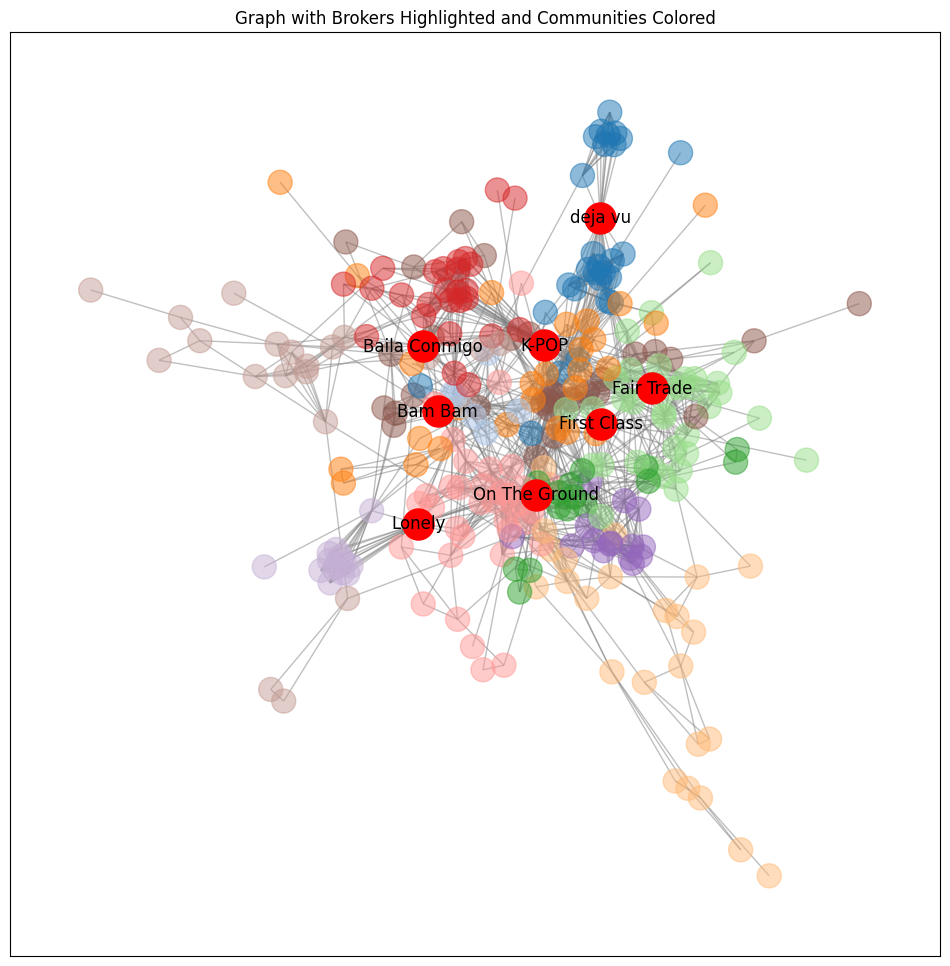

In [121]:
b_partition = community_louvain.best_partition(subgraph)

# Identify the brokers (nodes with high betweenness centrality)
betweenness = nx.betweenness_centrality(subgraph)
broker_threshold = 0.05  # You can adjust this threshold based on your needs
brokers = [node for node, centrality in betweenness.items() if centrality > broker_threshold]

# Create a color map for the nodes based on their community
colors = []
for node in subgraph.nodes():
    community_id = b_partition[node]
    colors.append(plt.get_cmap('tab20')(community_id))

plt.figure(figsize=(12, 12))

# Draw the nodes with colors based on their communities
pos = nx.spring_layout(subgraph)  # You can use any other layout

nx.draw_networkx_nodes(subgraph, pos, node_color=colors, node_size=300, alpha=0.5)

# Draw the edges
nx.draw_networkx_edges(subgraph, pos, edge_color='gray', alpha=0.5)

# Highlight brokers and add labels using the 'title' attribute
broker_labels = {node: subgraph.nodes[node]['title'] for node in brokers}

nx.draw_networkx_nodes(subgraph, pos, nodelist=brokers, node_color='r', node_size=500)
nx.draw_networkx_labels(subgraph, pos, labels=broker_labels, font_size=12, font_color='black')

plt.title('Graph with Brokers Highlighted and Communities Colored')
plt.show()


#### KLASTERIZACIJA

In [122]:
k_means_columns=["danceability","energy","loudness","acousticness","speechiness","instrumentalness","liveness","valence","tempo","mode","key"]
added_tracks[k_means_columns].isna().sum()

danceability        0
energy              0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
mode                0
key                 0
dtype: int64

##### Iscrtavanje matrice korelacije i prepoznavanje atributa visoke korelacije

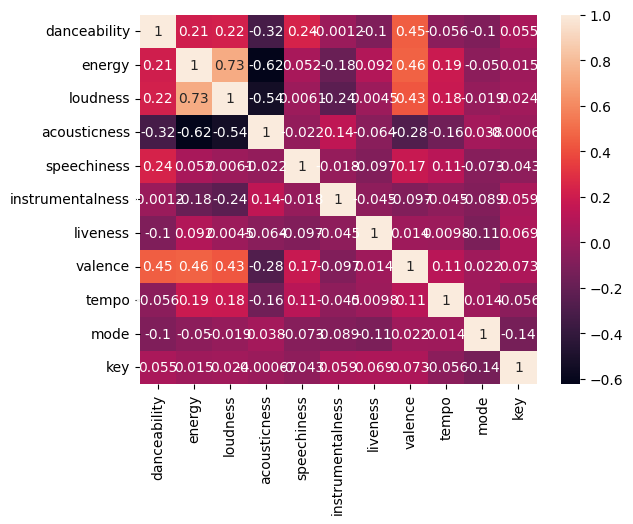

In [123]:
sn.heatmap(added_tracks[k_means_columns].corr(), annot=True)
plt.show()

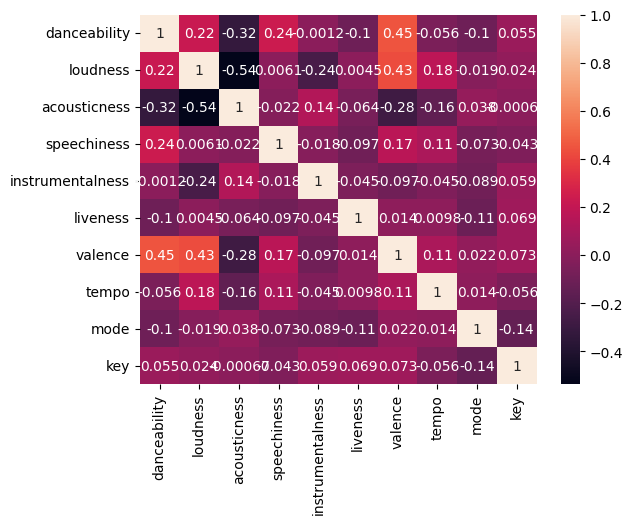

In [124]:
k_means_columns2=["danceability", "loudness","acousticness","speechiness","instrumentalness","liveness","valence","tempo","mode","key"]
sn.heatmap(added_tracks[k_means_columns2].corr(), annot=True)
plt.show()

##### Odredjivanje pogodnog broja klastera metodom siluete i metodom lakta

In [125]:
songs_normed = added_tracks[k_means_columns2].apply(lambda x: noramlize_feature(x))

In [126]:
eval_metrics= pd.DataFrame(columns=["k", "tot.within.ss"])
silhouette=dict()
for k in range(2,10):
    seed(10)

    kmeans= KMeans(n_clusters=k,n_init=1000,max_iter=20)
    kmeans.fit(songs_normed)
    labels=kmeans.labels_

    eval_metrics.loc[len(eval_metrics.index)]=[k,kmeans.inertia_]
    sil=silhouette_score(songs_normed,labels,metric="euclidean",sample_size=1000)
    silhouette.update({k:sil})
    print ("Silhouette score for k(clusters) = "+str(k)+" is "
           +str(round(sil,3)))
print(eval_metrics)
print(max(silhouette,key=silhouette.get))

Silhouette score for k(clusters) = 2 is 0.353
Silhouette score for k(clusters) = 3 is 0.276
Silhouette score for k(clusters) = 4 is 0.209
Silhouette score for k(clusters) = 5 is 0.207
Silhouette score for k(clusters) = 6 is 0.214
Silhouette score for k(clusters) = 7 is 0.214
Silhouette score for k(clusters) = 8 is 0.195
Silhouette score for k(clusters) = 9 is 0.188
     k  tot.within.ss
0  2.0     124.413709
1  3.0     110.966968
2  4.0      99.452047
3  5.0      88.415357
4  6.0      81.323691
5  7.0      77.180024
6  8.0      73.342582
7  9.0      69.654584
2


##### Metod siluete

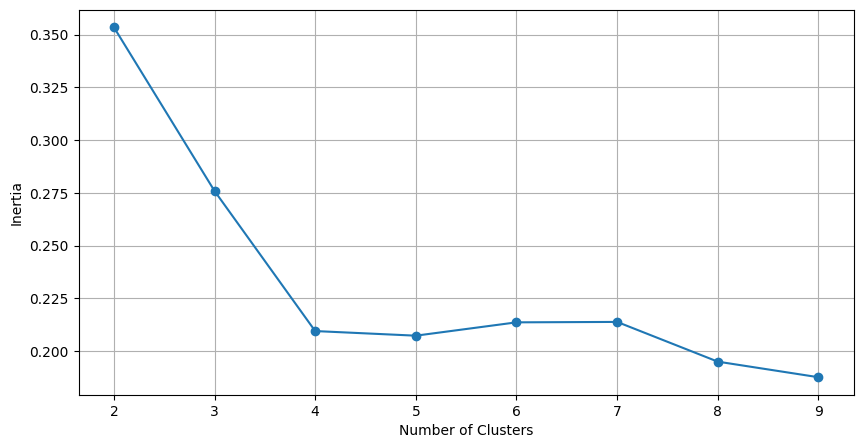

In [127]:
fig = plt.subplots(figsize=(10, 5))
plt.plot(silhouette.keys(), silhouette.values(), 'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

Metoda lakta

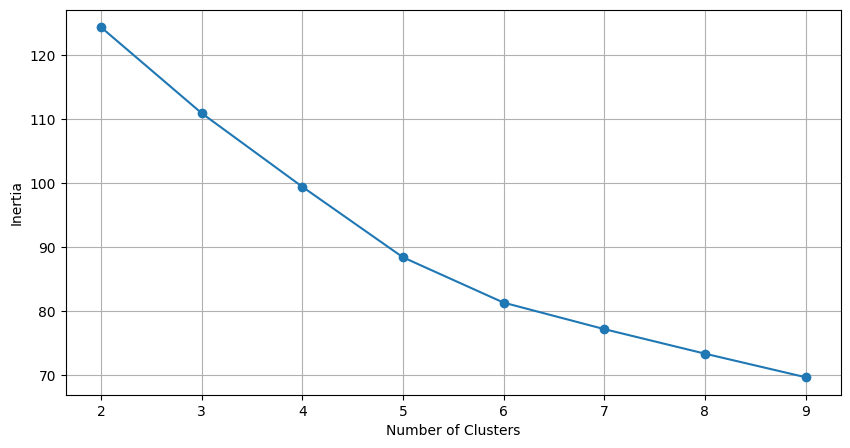

In [128]:
plt.subplots(figsize=(10, 5))
plt.plot(eval_metrics.k, eval_metrics['tot.within.ss'], 'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

##### Primena klaasterizacije nad skupom podataka

In [129]:
kmeans = KMeans(n_clusters=5, n_init=1000, max_iter=20)
kmeans.fit(songs_normed)
added_tracks["cluster"] = kmeans.labels_

In [130]:
partition

{'1BxfuPKGuaTgP7aM0Bbdwr': 0,
 '61KpQadow081I2AsbeLcsb': 0,
 '3hUxzQpSfdDqwM3ZTFQY0K': 0,
 '0V3wPSX9ygBnCm8psDIegu': 0,
 '7KokYm8cMIXCsGVmUvKtqf': 0,
 '1Iq8oo9XkmmvCQiGOfORiz': 0,
 '5jQI2r1RdgtuT8S3iG8zFC': 0,
 '3rWDp9tBPQR9z6U5YyRSK4': 0,
 '1wtOxkiel43cVs0Yux5Q4h': 0,
 '3KdoeNlEN0BoAKWzaRLNZa': 0,
 '5N3hjp1WNayUPZrA8kJmJP': 0,
 '5enxwA8aAbwZbf5qCHORXi': 0,
 '3CeCwYWvdfXbZLXFhBrbnf': 0,
 '0lx2cLdOt3piJbcaXIV74f': 0,
 '4P9Q0GojKVXpRTJCaL3kyy': 0,
 '4LEK9rD7TWIG4FCL1s27XC': 0,
 '4Dvkj6JhhA12EX05fT7y2e': 2,
 '6UelLqGlWMcVH1E5c4H7lY': 2,
 '3jjujdWJ72nww5eGnfs2E7': 2,
 '1qEmFfgcLObUfQm0j1W2CK': 2,
 '5KCbr5ndeby4y4ggthdiAb': 2,
 '0yLdNVWF3Srea0uzk55zFn': 2,
 '2KslE17cAJNHTsI2MI0jb2': 2,
 '7x9aauaA9cu6tyfpHnqDLo': 2,
 '4iJyoBOLtHqaGxP12qzhQI': 2,
 '5w40ZYhbBMAlHYNDaVJIUu': 2,
 '72yP0DUlWPyH8P7IoxskwN': 2,
 '4u4NyuceXP7Uzh7XFJKCr1': 2,
 '31qCy5ZaophVA81wtlwLc4': 2,
 '5JqZ3oqF00jkT81foAFvqg': 2,
 '27ycaQnQAxaPiyeg3nr2aB': 2,
 '3nqQXoyQOWXiESFLlDF1hG': 3,
 '7oDd86yk8itslrA9HRP2ki': 4,
 '4sx6NRwL

#### Kreiranje novih skupova podataka na osnovu numera iz klastera i zajednice, kao i njihova vizualizacije i analiza

In [131]:
added_tracks['community'] = added_tracks['id'].apply(lambda x: int(partition[x])+1)
added_tracks.to_csv(all_name,index=False)

In [132]:
community_songs = [k for k,v in partition.items() if float(v) == partition[song_id]]
community_songs_df = added_tracks.loc[added_tracks['id'].isin(community_songs),:]

In [133]:
grouped_community_writers, grouped_community_producers, community_added_tracks= group_track_by_writer_producer(community_songs_df, 'grouped_community_writers','grouped_community_producers',"community_all_tracks",track_name)

In [7]:
import ast
grouped_community_writers = pd.read_csv("grouped_community_writers_please_please_please.csv")
grouped_community_writers['writers'] = grouped_community_writers['writers'].apply(ast.literal_eval)
grouped_community_writers['track_ids'] = grouped_community_writers['track_ids'].apply(ast.literal_eval)
grouped_community_producers = pd.read_csv("grouped_community_producers_please_please_please.csv")
grouped_community_producers['producers'] = grouped_community_producers['producers'].apply(ast.literal_eval)
grouped_community_producers['track_ids'] = grouped_community_producers['track_ids'].apply(ast.literal_eval)
community_added_tracks = pd.read_csv("community_all_tracks_please_please_please.csv")
community_added_tracks['Writers'] = community_added_tracks['Writers'].apply(ast.literal_eval)
community_added_tracks['Producers'] = community_added_tracks['Producers'].apply(ast.literal_eval)

In [8]:
grouped_community_producers

track_ids  count  \
0    (0V3wPSX9ygBnCm8psDIegu, 1BxfuPKGuaTgP7aM0Bbdwr)      2   
1    (0V3wPSX9ygBnCm8psDIegu, 1Iq8oo9XkmmvCQiGOfORiz)      2   
2    (0V3wPSX9ygBnCm8psDIegu, 1wtOxkiel43cVs0Yux5Q4h)      2   
3    (0V3wPSX9ygBnCm8psDIegu, 3CeCwYWvdfXbZLXFhBrbnf)      1   
4    (0V3wPSX9ygBnCm8psDIegu, 3KdoeNlEN0BoAKWzaRLNZa)      1   
..                                                ...    ...   
115  (5N3hjp1WNayUPZrA8kJmJP, 7KokYm8cMIXCsGVmUvKtqf)      1   
116  (5enxwA8aAbwZbf5qCHORXi, 5jQI2r1RdgtuT8S3iG8zFC)      2   
117  (5enxwA8aAbwZbf5qCHORXi, 7KokYm8cMIXCsGVmUvKtqf)      2   
118  (5jQI2r1RdgtuT8S3iG8zFC, 7KokYm8cMIXCsGVmUvKtqf)      4   
119  (61KpQadow081I2AsbeLcsb, 7lPN2DXiMsVn7XUKtOW1CS)      1   

                                             producers  
0                        [Taylor Swift, Jack Antonoff]  
1                        [Jack Antonoff, Taylor Swift]  
2                        [Jack Antonoff, Taylor Swift]  
3                                       [Taylor Swift]  
4                                      [Jack Antonoff]  
..                                                 ...  
115                                    [Jack Antonoff]  
116                      [Jack Antonoff, Taylor Swift]  
117                      [Jack Antonoff, Taylor Swift]  
118  [Sounwave, Jack Antonoff, Taylor Swift, Jahaan...  
119                                        [Dan Nigro]  

[120 rows x 3 columns]

In [108]:
def create_graph(added_tracks, grouped_writers_df, grouped_producers_df, song_id):

    G = nx.Graph()

    for index, row in added_tracks.iterrows():
        color = '#41b6c4' if row['id'] == song_id else '#e6550d'
        G.add_node(row['id'], label = row['Track Name'], title=row['Track Name'], artist=row['Artist Name'], popularity=row['Popularity'], year='2023',topic=row['topic'], color = color)

    for index, row in grouped_writers_df.iterrows():
        G.add_edge(row['track_ids'][0], row['track_ids'][1], relation = 'writer',label = 'writer',weight=2*int(row['count']), type='writer', color = 'blue',count=row['count'], collaborators = row['writers'])

    for _, row in grouped_producers_df.iterrows():
        if G.has_edge(row['track_ids'][0], row['track_ids'][1]):
            G[row['track_ids'][0]][row['track_ids'][1]]['relation'] = 'writer & producer'
            G[row['track_ids'][0]][row['track_ids'][1]]['label'] = 'writer & producer'
            G[row['track_ids'][0]][row['track_ids'][1]]['type'] = 'writer & producer'
            G[row['track_ids'][0]][row['track_ids'][1]]['color'] = 'green'
            G[row['track_ids'][0]][row['track_ids'][1]]['count'] = 2*(int(row['count']) + G[row['track_ids'][0]][row['track_ids'][1]]['count'])

            G[row['track_ids'][0]][row['track_ids'][1]]['collaborators'] = list(set(G[row['track_ids'][0]][row['track_ids'][1]]['collaborators'] + row['producers']))
        else:
            G.add_edge(row['track_ids'][0], row['track_ids'][1], relation = 'producer',label = 'producer',weight=2*int(row['count']), type='producer', color = 'brown',count=row['count'], collaborators = row['producers'])

    return G

In [109]:
G_community = create_graph(community_added_tracks,grouped_community_writers,grouped_community_producers,song_id)

In [110]:
G_community

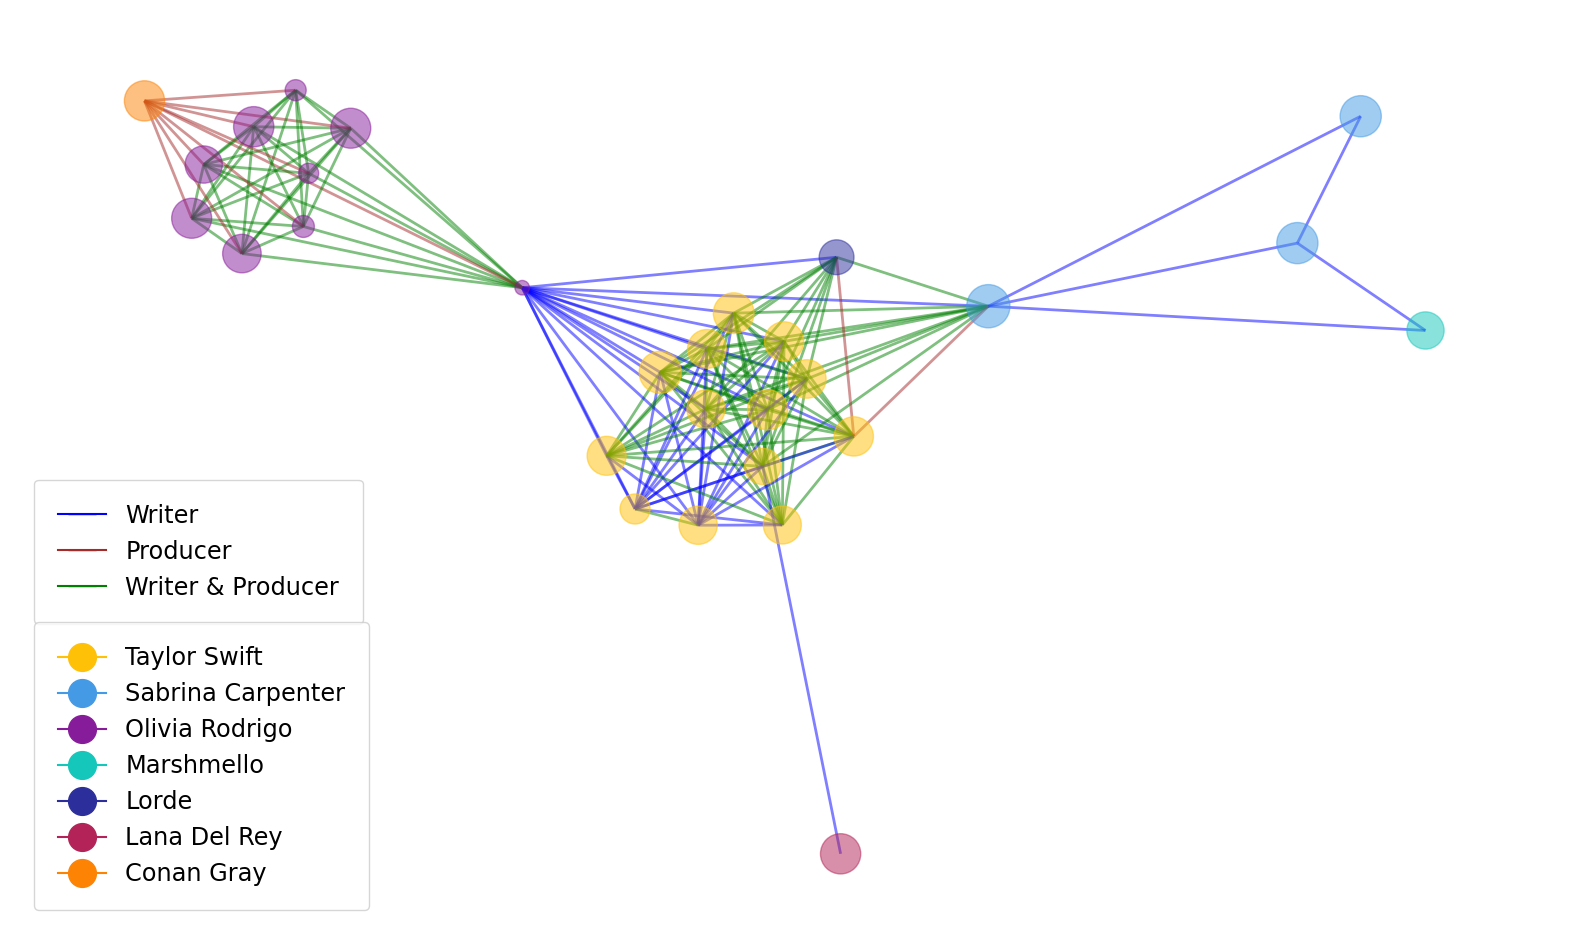

In [115]:
rgb_colors = {'Taylor Swift':'#FFC107', 'Sabrina Carpenter':'#449AE4','Olivia Rodrigo':'#871C9A', 'Marshmello':'#14C7BA', 'Lorde':'#2C2E9C', 'Lana Del Rey':'#B32357', 'Conan Gray':'#FD8305'}
plt.figure(figsize=(20, 12))
edges = G_community.edges()
nodes = G_community.nodes()
edge_colors = [G_community[u][v]['color'] for u,v in edges]

node_colors = [rgb_colors[G_community.nodes[node]['artist']] for node in nodes]
legend_labels_2 = ['Writer', 'Producer', 'Writer & Producer']
legend_colors_2 = ['blue', 'brown', 'green']

size = [float(G_community.nodes[u]['popularity'])*10 for u in nodes]
legend_labels = ['Writer', 'Producer', 'Writer & Producer']
legend_colors = ['blue', 'brown', 'green']


legend_markers_2 = [plt.Line2D([0], [0], marker='_', color=color, markerfacecolor=color, markersize=20) for color in
                    legend_colors_2]
legend1 = plt.legend(legend_markers_2, legend_labels_2, loc='lower left', fontsize='xx-large', bbox_to_anchor=(0, 0.31), frameon=True, borderpad=1,
           borderaxespad=1)

plt.gca().add_artist(legend1)

legend_markers = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markersize=20) for color in
                  rgb_colors.values()]
legend2 = plt.legend(legend_markers, rgb_colors.keys() , loc='lower left', fontsize='xx-large', bbox_to_anchor=(0, 0), frameon=True, borderpad=1,
                     borderaxespad=1)


nx.draw(G_community, labels=nx.get_node_attributes(G_community, 'artist'), width=2, edge_color=edge_colors, alpha=0.5,
            with_labels=False, node_color=node_colors, node_size=size, font_weight='bold')



##### Odredjivanje mera centralnosti nad skupom

In [75]:
sub_tracks_community = centrality_measuers(community_added_tracks, G_community)
sub_tracks_community[['Track Name','Artist Name','Writers','Producers','Degree']].sort_values(by='Degree',ascending=False)

Track Name        Artist Name  \
1                                             deja vu     Olivia Rodrigo   
8                                   Snow On The Beach       Taylor Swift   
0                                        Cruel Summer       Taylor Swift   
2                                              august       Taylor Swift   
3                                           Anti-Hero       Taylor Swift   
4                                               Karma       Taylor Swift   
5   Is It Over Now? (Taylor's Version) (From The V...       Taylor Swift   
6                                       Lavender Haze       Taylor Swift   
7                                       Midnight Rain       Taylor Swift   
11  All Too Well (10 Minute Version) (Taylor's Ver...       Taylor Swift   
10                               Please Please Please  Sabrina Carpenter   
13                                             willow       Taylor Swift   
15                                           cardigan       Taylor Swift   
14                  All Of The Girls You Loved Before       Taylor Swift   
12                      Love Story (Taylor’s Version)       Taylor Swift   
9                                         Solar Power              Lorde   
16                                            traitor     Olivia Rodrigo   
17                                     favorite crime     Olivia Rodrigo   
18                                           good 4 u     Olivia Rodrigo   
19                                      get him back!     Olivia Rodrigo   
20  Can’t Catch Me Now - from The Hunger Games: Th...     Olivia Rodrigo   
21                                    bad idea right?     Olivia Rodrigo   
22                                            vampire     Olivia Rodrigo   
23                                    drivers license     Olivia Rodrigo   
24                                            Heather         Conan Gray   
26                                            Feather  Sabrina Carpenter   
27                                           Nonsense  Sabrina Carpenter   
28                                            Be Kind         Marshmello   
25                                  Say Yes To Heaven       Lana Del Rey   

                                              Writers  \
1   [St. Vincent, Taylor Swift, Jack Antonoff, Oli...   
8         [Taylor Swift, Jack Antonoff, Lana Del Rey]   
0          [St. Vincent, Jack Antonoff, Taylor Swift]   
2                       [Jack Antonoff, Taylor Swift]   
3                       [Taylor Swift, Jack Antonoff]   
4   [Taylor Swift, Jack Antonoff, Jahaan Sweet, Ke...   
5                       [Taylor Swift, Jack Antonoff]   
6   [Taylor Swift, Jack Antonoff, Zoë Kravitz, Sou...   
7                       [Jack Antonoff, Taylor Swift]   
11                           [Liz Rose, Taylor Swift]   
10      [Sabrina Carpenter, Amy Allen, Jack Antonoff]   
13                      [Aaron Dessner, Taylor Swift]   
15                      [Aaron Dessner, Taylor Swift]   
14                   [Taylor Swift, Ging, Louis Bell]   
12                                     [Taylor Swift]   
9                              [Lorde, Jack Antonoff]   
16                        [Dan Nigro, Olivia Rodrigo]   
17                        [Olivia Rodrigo, Dan Nigro]   
18  [Josh Farro, Hayley Williams, Dan Nigro, Olivi...   
19                        [Olivia Rodrigo, Dan Nigro]   
20                        [Olivia Rodrigo, Dan Nigro]   
21                        [Olivia Rodrigo, Dan Nigro]   
22                        [Olivia Rodrigo, Dan Nigro]   
23                        [Dan Nigro, Olivia Rodrigo]   
24                                       [Conan Gray]   
26          [Amy Allen, John Ryan, Sabrina Carpenter]   
27   [Steph Jones, Julian Bunetta, Sabrina Carpenter]   
28  [Amy Allen, Freddy Wexler, Gian Stone, Marshme...   
25                        [Lana Del Rey, Rick Nowels]   

                                            Produce

In [76]:
sub_tracks_community[['Degree','Closeness','Betweenness','Eigen']].describe()

Degree  Closeness  Betweenness      Eigen
count  29.000000  29.000000    29.000000  29.000000
mean   11.241379   0.598711     0.026820   0.152419
std     5.026041   0.104608     0.091536   0.107949
min     1.000000   0.411765     0.000000   0.015230
25%     9.000000   0.549020     0.000000   0.045749
50%    13.000000   0.608696     0.000000   0.200722
75%    15.000000   0.682927     0.005291   0.258673
max    24.000000   0.875000     0.457672   0.285683

In [ ]:
sub_tracks.loc[sub_tracks['id']==song_id,['Degree','Closeness', 'Betweenness', 'Eigen']]

Shapiro-Wilk test for Degree:
Statistic: 0.9010
p-value: 0.010341674502954057
Not normal

Shapiro-Wilk test for Closeness:
Statistic: 0.9030
p-value: 0.011559424293688704
Not normal

Shapiro-Wilk test for Betweenness:
Statistic: 0.3300
p-value: 1.9413509857517943e-10
Not normal

Shapiro-Wilk test for Eigen:
Statistic: 0.7606
p-value: 1.7720907642066577e-05
Not normal



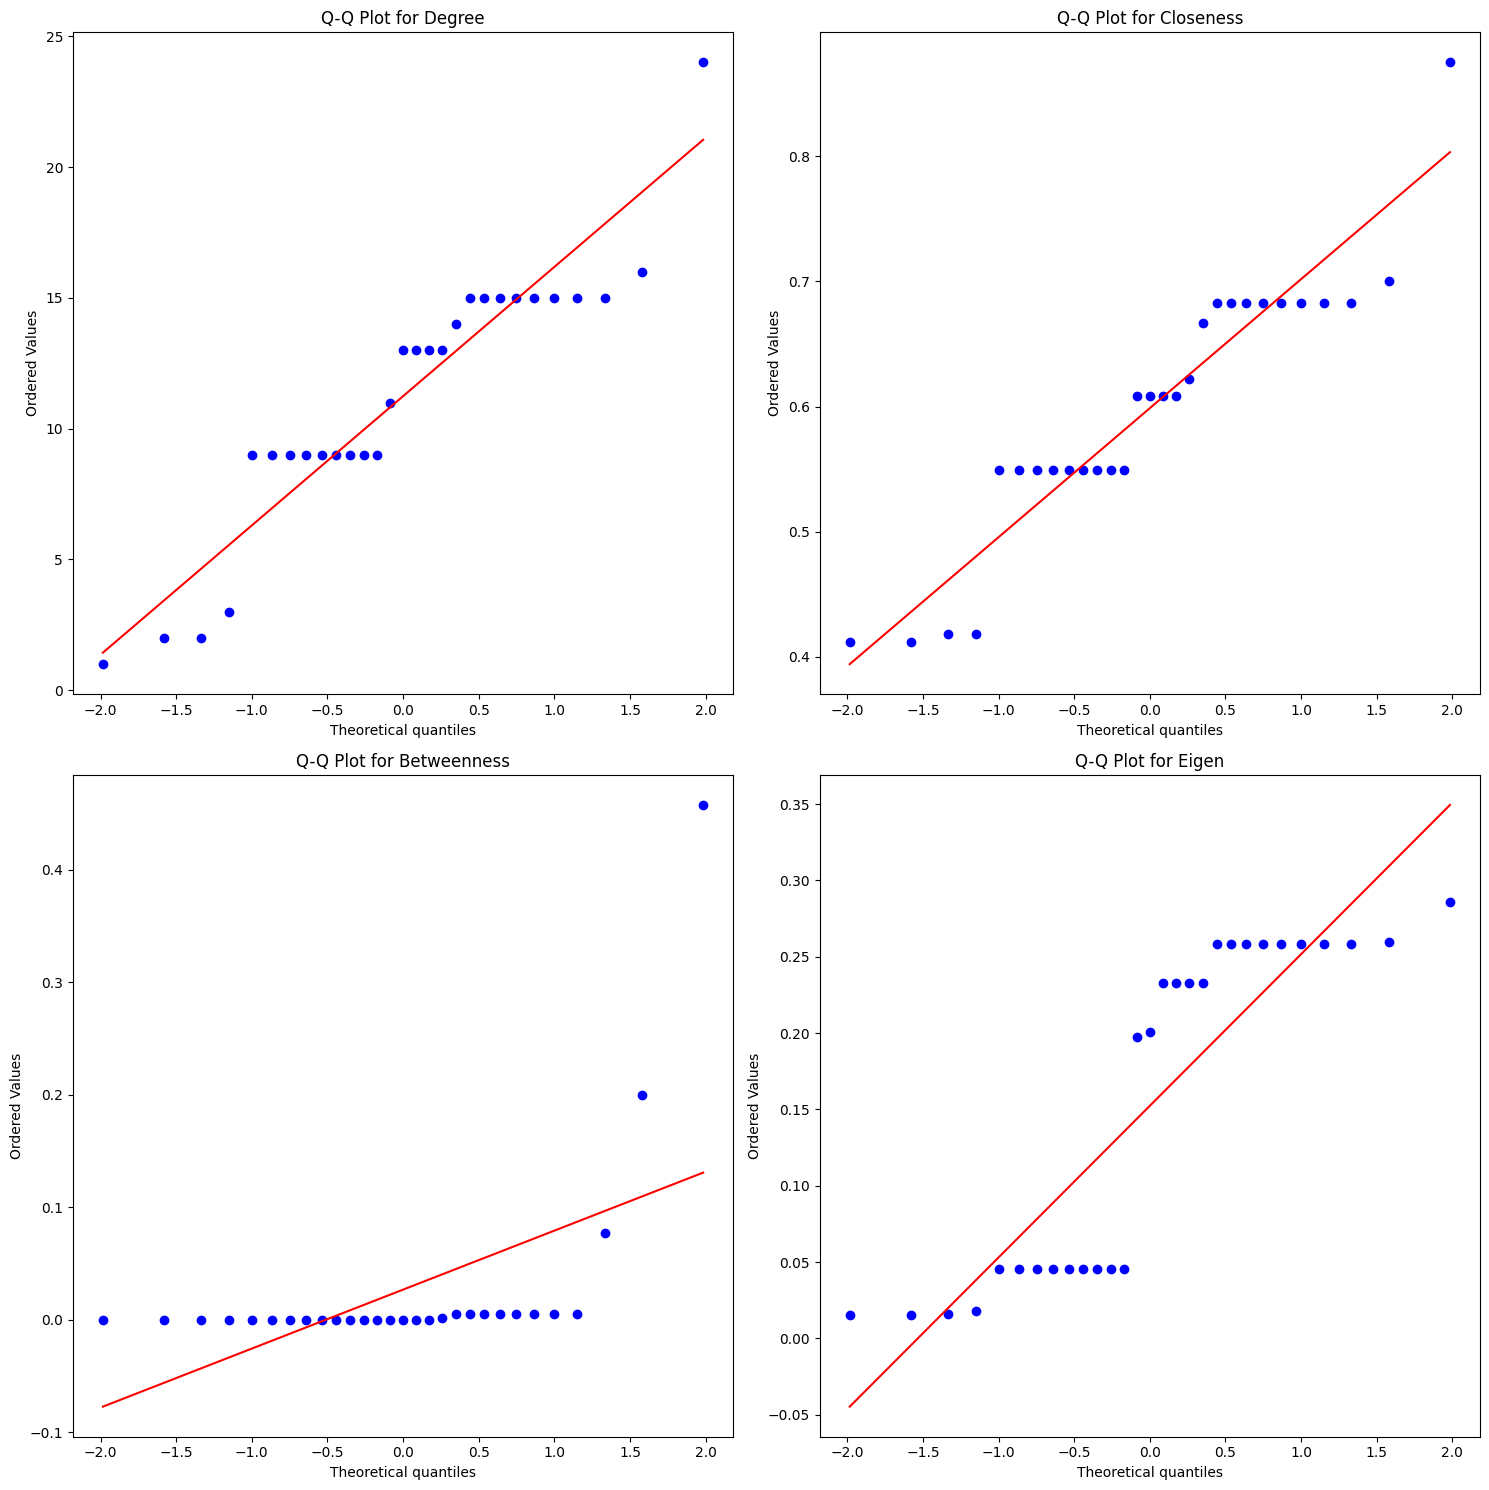

In [139]:
columns_to_test = ['Degree', 'Closeness', 'Betweenness', 'Eigen']

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.ravel()

# Perform Shapiro-Wilk test on each column
for i, column in enumerate(columns_to_test):
    statistic, p_value = stats.shapiro(sub_tracks_community[column])
    print(f"Shapiro-Wilk test for {column}:")
    print(f"Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:}")
    print("Normal" if p_value > 0.05 else "Not normal")
    print()

    stats.probplot(sub_tracks_community[column], dist="norm", plot=axs[i])
    axs[i].set_title(f"Q-Q Plot for {column}")

plt.tight_layout()
plt.show()

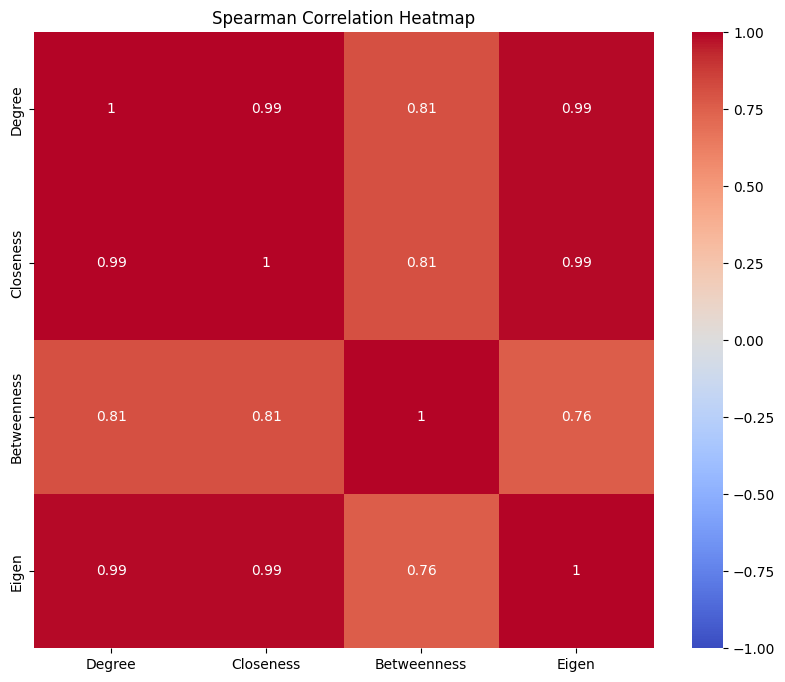

In [140]:
correlation_matrix = sub_tracks_community.loc[:,"Degree":].corr(method='spearman')

#create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

##### Provera postojanja homofilije na osnovu teme

In [141]:
community_assortativity = nx.assortativity.attribute_assortativity_coefficient(G_community,'topic')
community_assortativity

-0.07446161722824869

##### Odredjivanje najudaljenije numere na osnovu euklidsog rastojanja primenjenog na audio komponentama

In [142]:
community_euclidian = calculate_euclidian_distance(community_added_tracks,new_tracks,True,True)
community_euclidian

Track Name                                          Say Yes To Heaven
Artist Name                                              Lana Del Rey
id                                             6GGtHZgBycCgGBUhZo81xe
uri                              spotify:track:6GGtHZgBycCgGBUhZo81xe
danceability                                                    0.485
energy                                                          0.348
key                                                                 6
loudness                                                      -11.576
mode                                                                0
speechiness                                                    0.0257
acousticness                                                    0.678
instrumentalness                                                0.167
liveness                                                        0.118
valence                                                         0.145
tempo               

##### Numere iz klastera koje imaju visoku cetralnost intermedijarnosti

In [143]:
(sub_tracks.loc[sub_tracks['id'].isin(list(community_added_tracks['id'])),['Track Name','Artist Name','Betweenness']].sort_values('Betweenness',ascending=False).head(5))

Track Name        Artist Name  Betweenness
1                             deja vu     Olivia Rodrigo     0.047591
4                               Karma       Taylor Swift     0.034167
6                       Lavender Haze       Taylor Swift     0.034167
14  All Of The Girls You Loved Before       Taylor Swift     0.031120
10               Please Please Please  Sabrina Carpenter     0.028969

##### Kreiranje skupa na osnovu klastera kome pripada numera za koju vrsimo analizu

In [144]:
cluster = int(added_tracks.loc[added_tracks['id']==song_id,'cluster'].iloc[0])
songs_from_cluster = added_tracks.loc[added_tracks['cluster']==cluster,:]

In [145]:
grouped_cluster_writers, grouped_cluster_producers, cluster_added_tracks= group_track_by_writer_producer(songs_from_cluster, 'grouped_cluster_writers','grouped_cluster_producers','cluster_all_tracks',track_name)
G_cluster = create_graph(cluster_added_tracks,grouped_cluster_writers,grouped_cluster_producers,song_id)

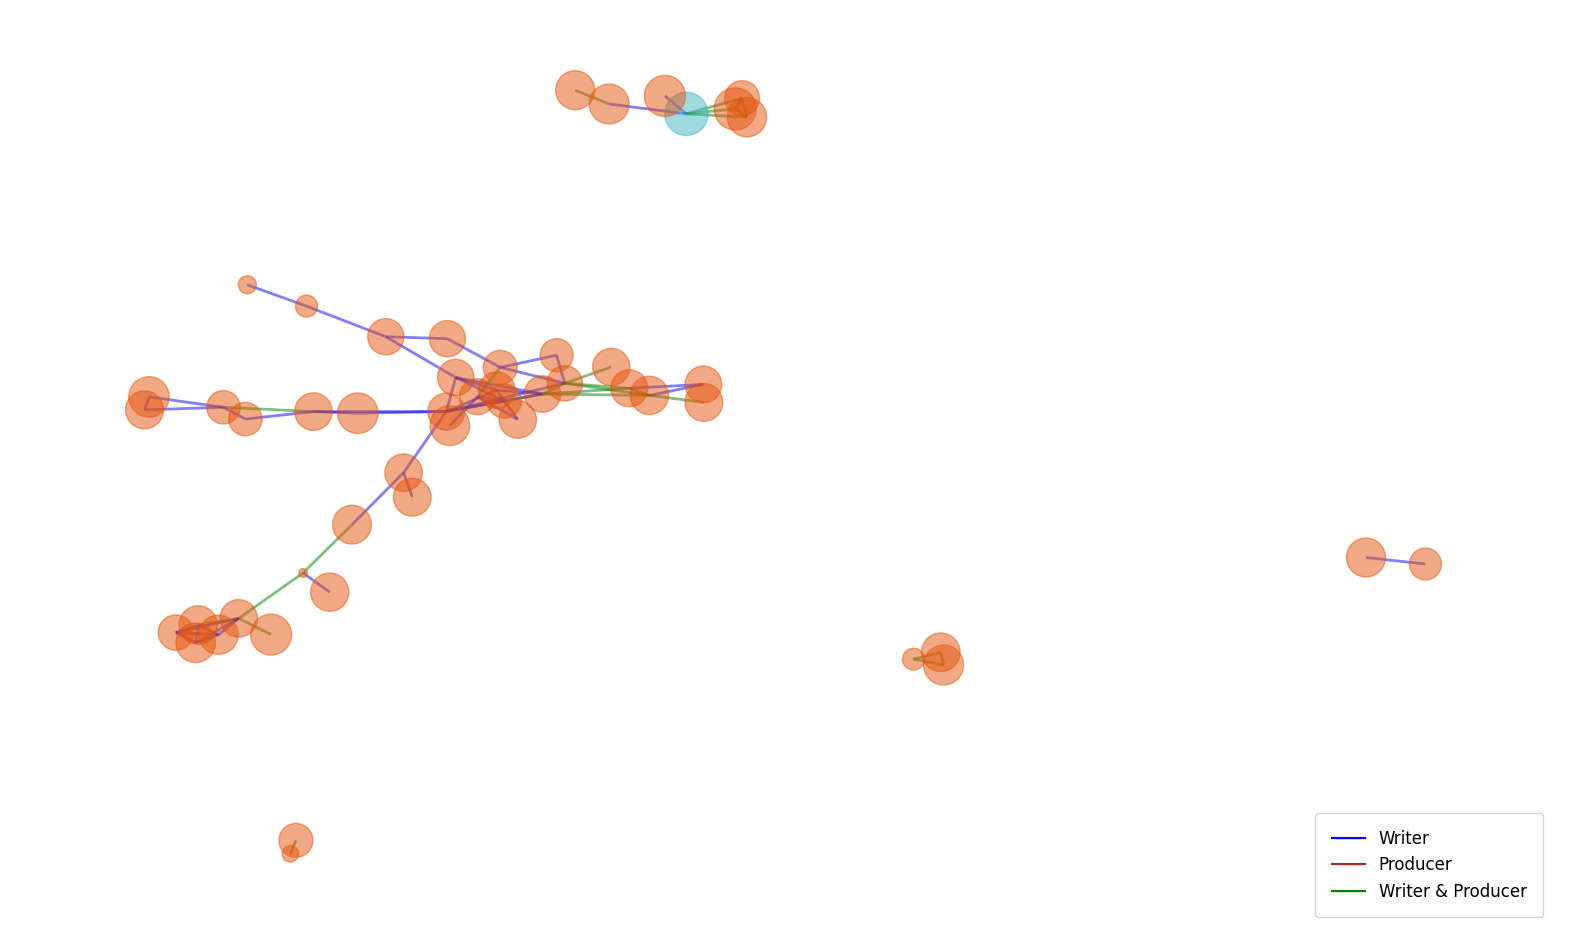

In [146]:
plot_graph(G_cluster)

Shapiro-Wilk test for Degree:
Statistic: 0.8764
p-value: 7.519299427138615e-05
Not normal

Shapiro-Wilk test for Closeness:
Statistic: 0.9505
p-value: 0.033002755001143705
Not normal

Shapiro-Wilk test for Betweenness:
Statistic: 0.5929
p-value: 1.1758026404136923e-10
Not normal

Shapiro-Wilk test for Eigen:
Statistic: 0.6806
p-value: 2.9715861163690603e-09
Not normal



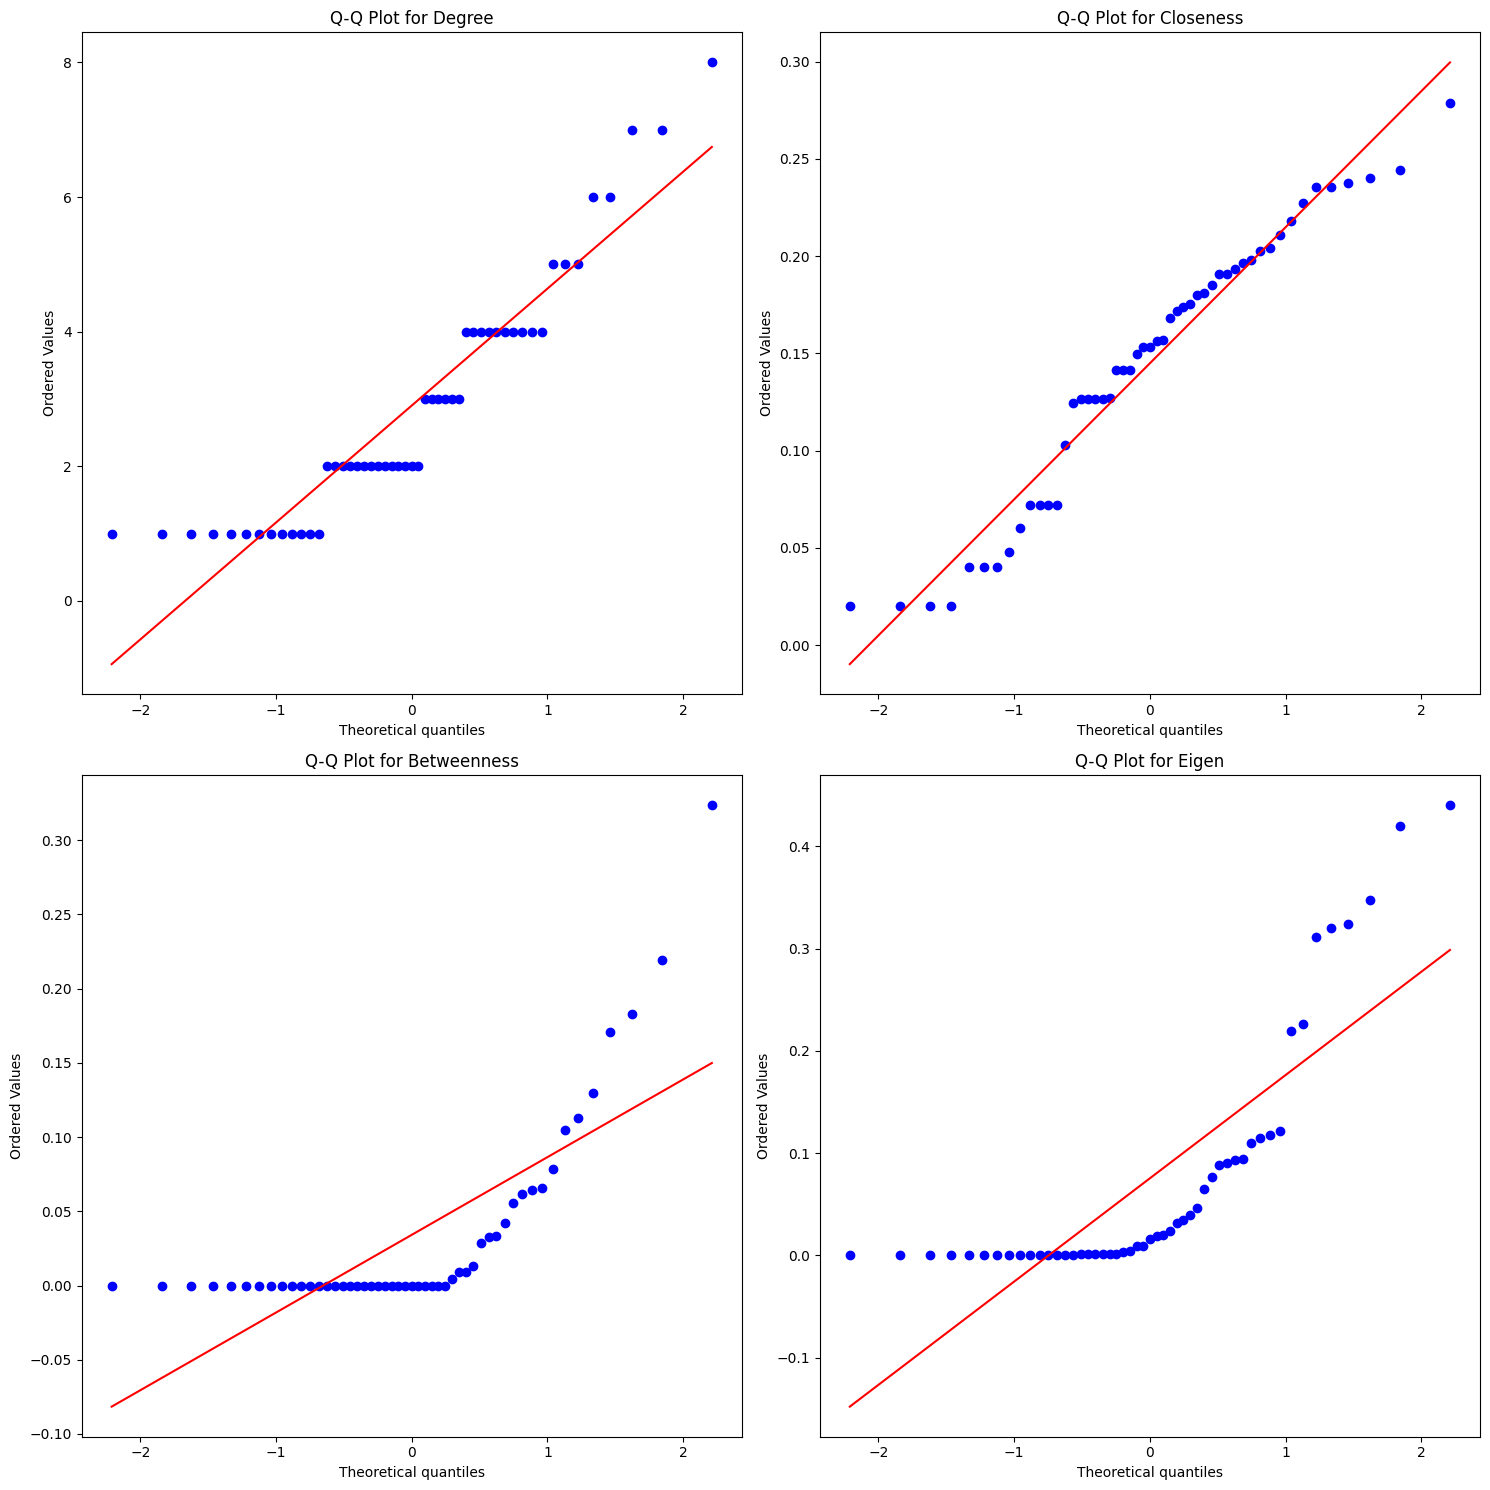

In [147]:
sub_tracks_cluster = centrality_measuers(cluster_added_tracks, G_cluster)

columns_to_test = ['Degree', 'Closeness', 'Betweenness', 'Eigen']

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.ravel()

# Perform Shapiro-Wilk test on each column
for i, column in enumerate(columns_to_test):
    statistic, p_value = stats.shapiro(sub_tracks_cluster[column])
    print(f"Shapiro-Wilk test for {column}:")
    print(f"Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:}")
    print("Normal" if p_value > 0.05 else "Not normal")
    print()

    stats.probplot(sub_tracks_cluster[column], dist="norm", plot=axs[i])
    axs[i].set_title(f"Q-Q Plot for {column}")

plt.tight_layout()
plt.show()

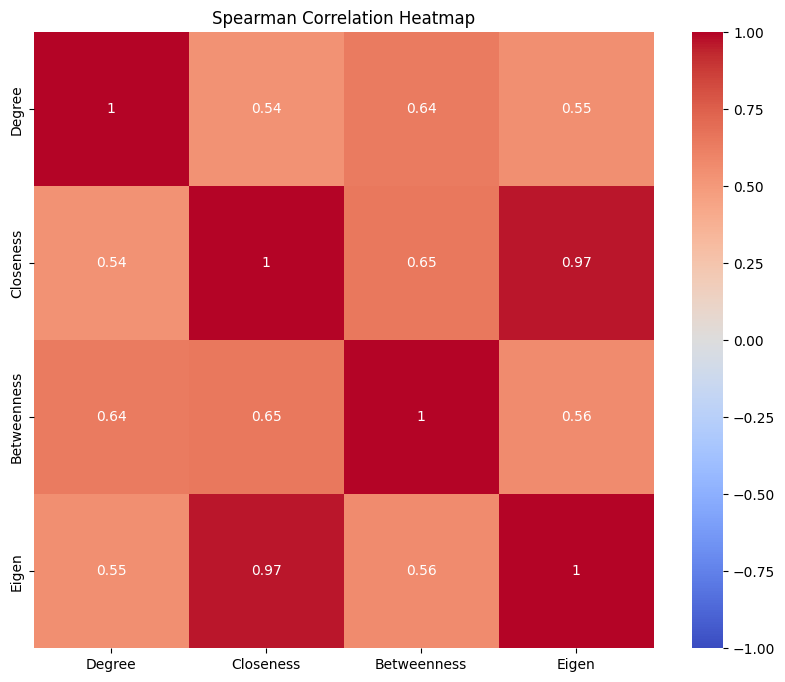

In [148]:
correlation_matrix = sub_tracks_cluster.loc[:, "Degree":].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

##### Provera prisustva homofilije

In [149]:
cluster_assortativity = nx.assortativity.attribute_assortativity_coefficient(G_cluster,'topic')
cluster_assortativity

-0.027929658637505506

##### Najbliza numera odredjena euklidskim rastojanjem koja se nalazi u klasteru

In [150]:
cluster_end_node = calculate_euclidian_distance(cluster_added_tracks,new_tracks,True,False)
cluster_end_node

Track Name                                         Late Night Talking
Artist Name                                              Harry Styles
id                                             1qEmFfgcLObUfQm0j1W2CK
uri                              spotify:track:1qEmFfgcLObUfQm0j1W2CK
danceability                                                    0.714
energy                                                          0.728
key                                                                10
loudness                                                       -4.595
mode                                                                1
speechiness                                                    0.0468
acousticness                                                    0.298
instrumentalness                                                  0.0
liveness                                                        0.106
valence                                                         0.901
tempo               

##### Provera postojanja puta izmedju cvorova numera

In [151]:
nx.has_path(G_cluster,song_id,cluster_end_node['id'])

True

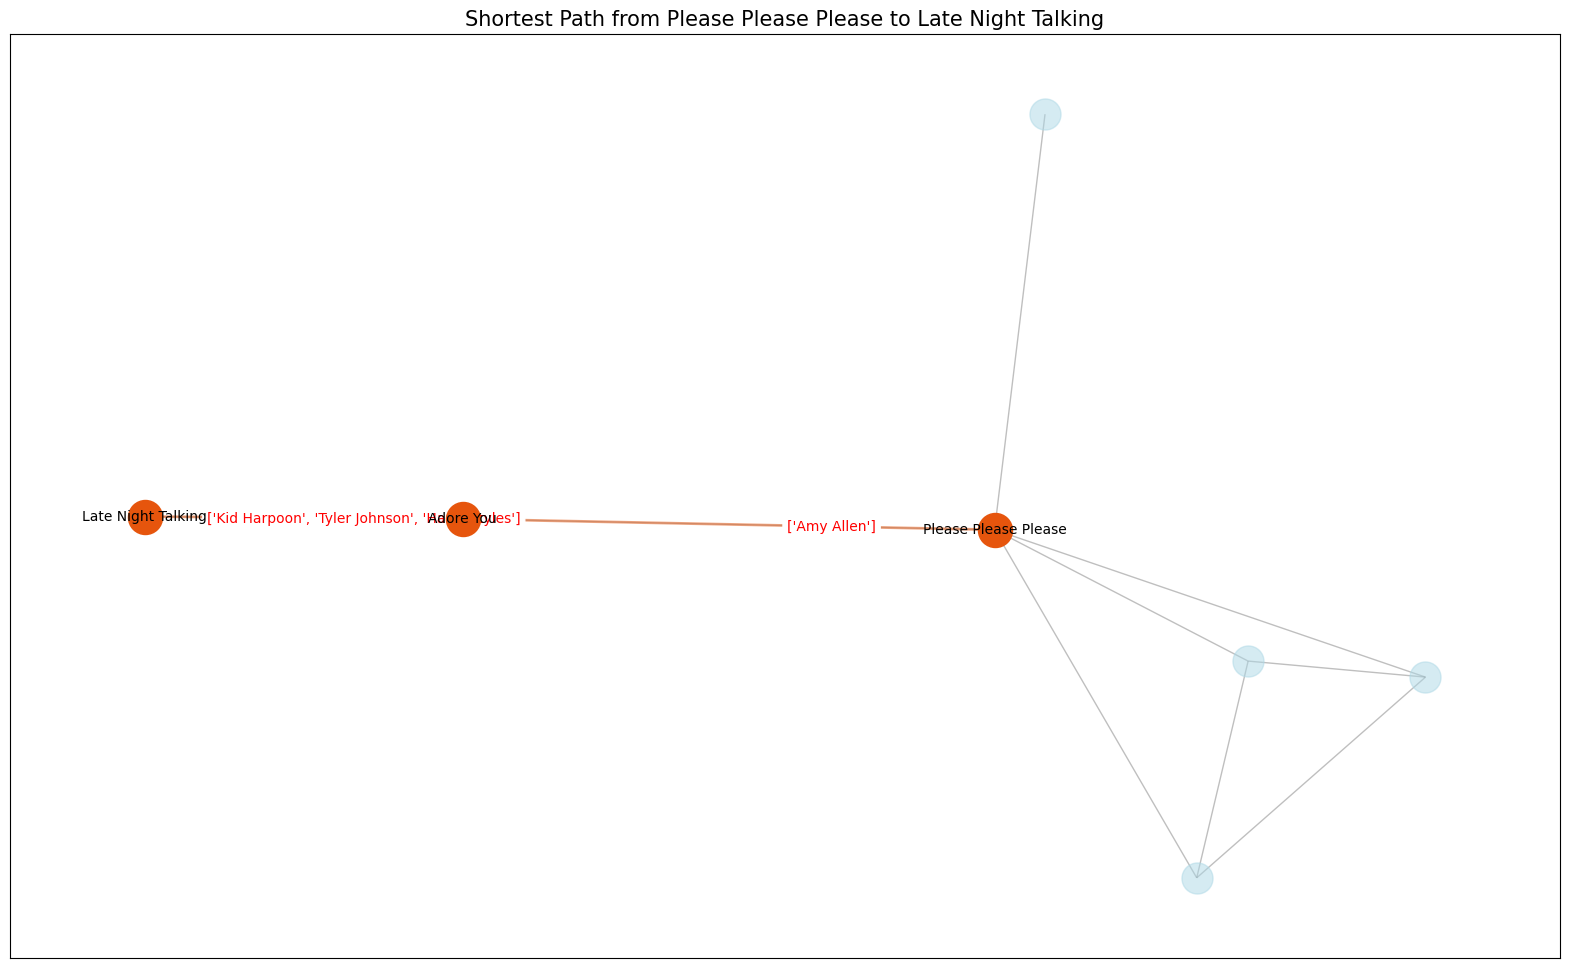

In [152]:
plot_graph_with_shortest_path(nx.ego_graph(G_cluster, song_id,3),song_id, cluster_end_node['id'])

In [153]:
cluster_least_similar = calculate_euclidian_distance(cluster_added_tracks,new_tracks,True,True)

In [156]:
nx.has_path(G,song_id,cluster_least_similar['id'])

True

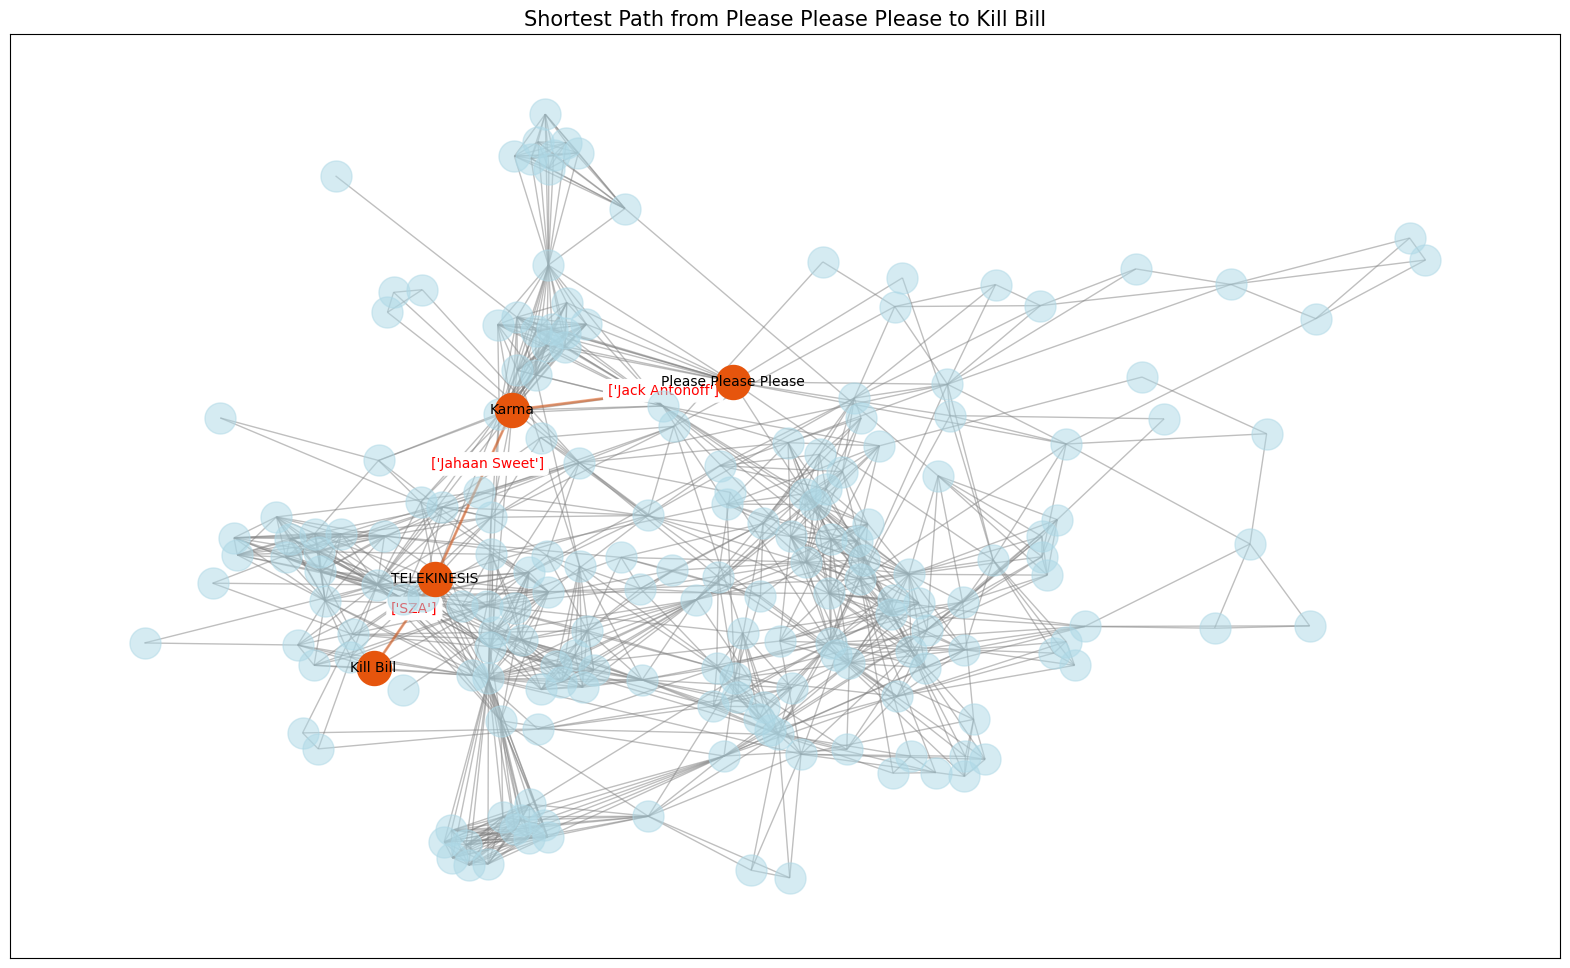

In [157]:
plot_graph_with_shortest_path(nx.ego_graph(G, song_id,3),song_id, cluster_least_similar['id'])

##### Kreiranje skupa ego-mreze nastale od pocetnog grafa

###### Odredjivanje radijusa ego-mreze na osnovu broja cvorova koji su udaljeni n-koraka, kao i euklidskog rastojanja ega u odnosu na prosecne vrednosti audio komponenti cvorova koju su udaljeni n-koraka

In [64]:
radius_nodes = pd.DataFrame(columns=radius_columns)

for radius in range(1,7):
    
    ego = nx.ego_graph(G,song_id,radius)
    ego_nodes_ids = [node for node, length in nx.single_source_shortest_path_length(ego, song_id).items() if length == radius] 
    ego_nodes = added_tracks[added_tracks['id'].isin(ego_nodes_ids)]
    mean_values = pd.DataFrame(ego_nodes[radius_columns[1:]].mean()).T
    mean_values['node radius'] = radius
    mean_values['number of nodes'] = len(ego_nodes)
    radius_nodes = pd.concat([radius_nodes,mean_values],axis=0)
    radius_nodes.reset_index(drop=True, inplace=True)

In [65]:
radius_nodes[['node radius','number of nodes']]

node radius  number of nodes
0           1             17.0
1           2             52.0
2           3            123.0
3           4             65.0
4           5             19.0
5           6              7.0

In [66]:
calculate_euclidian_distance(radius_nodes,new_tracks,radio_nodes=True)

id   distance
0   1   9.351064
1   2  10.705509
2   3  11.181482
3   4   8.802365
4   5  11.522055
5   6  10.581611

##### Kreiranje ego-mreze sa vrednoscu radijusa 2

In [118]:
ego = nx.ego_graph(G,song_id,2)
#plot_graph(ego)

In [117]:
G

In [125]:
ego

##### Provera prisustva homofilije

In [68]:
ego_assortativity = nx.assortativity.attribute_assortativity_coefficient(ego,'topic')
ego_assortativity

-0.03930074696287277

##### Prikaz grafa gde boja cvora predstvaljaju dominantnu temu u tekstu numere

In [122]:
def plot_graph(G,topic=False, layout = None):
    rgb_colors = ['#FFC107','#449AE4','#871C9A','#14C7BA']
    rgb_labels = ['Hedonism and nightlife','Romance and vulnerability','Ambitions, aspirations and struggles','Love and devotion']
    plt.figure(figsize=(20, 12))
    edges = G.edges()
    nodes = G.nodes()
    edge_colors = [G[u][v]['color'] for u,v in edges]

    node_colors = [rgb_colors[G.nodes[node]['topic'][0]] for node in nodes]


    size = [float(G.nodes[u]['popularity'])*10 for u in nodes]
    legend_labels = ['Writer', 'Producer', 'Writer & Producer']
    legend_colors = ['blue', 'brown', 'green']

    legend_markers = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markersize=20) for color in
                      rgb_colors]
    legend1 = plt.legend(legend_markers, rgb_labels , loc='lower left', fontsize='xx-large',bbox_to_anchor=(0, 0), frameon=True, borderpad=1,
                     borderaxespad=1)

    plt.gca().add_artist(legend1)

    legend_markers_2 = [plt.Line2D([0], [0], marker='_', color=color, markerfacecolor=color, markersize=20) for color in
                        legend_colors]
    legend2 = plt.legend(legend_markers_2, legend_labels, loc='lower left', fontsize='xx-large',bbox_to_anchor=(0, 0.20), frameon=True, borderpad=1,
           borderaxespad=1)
    if layout:
        nx.draw(G, labels=nx.get_node_attributes(G, 'title'), width=2, edge_color=edge_colors, alpha=0.5,
                with_labels=False, node_color=node_colors, node_size=size, font_weight='bold',pos=layout)

    else:
        nx.draw(G, labels=nx.get_node_attributes(G, 'title'), width=2, edge_color=edge_colors, alpha=0.65,
                with_labels=False, node_color=node_colors, node_size=size, font_weight='bold')
        

<Figure size 640x480 with 0 Axes>

/var/folders/j7/c9_vfl1x04xbb4qtm3y20r4r0000gn/T/ipykernel_81149/3665847812.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  node_colors = [rgb_colors[G.nodes[node]['topic'][0]] for node in nodes]


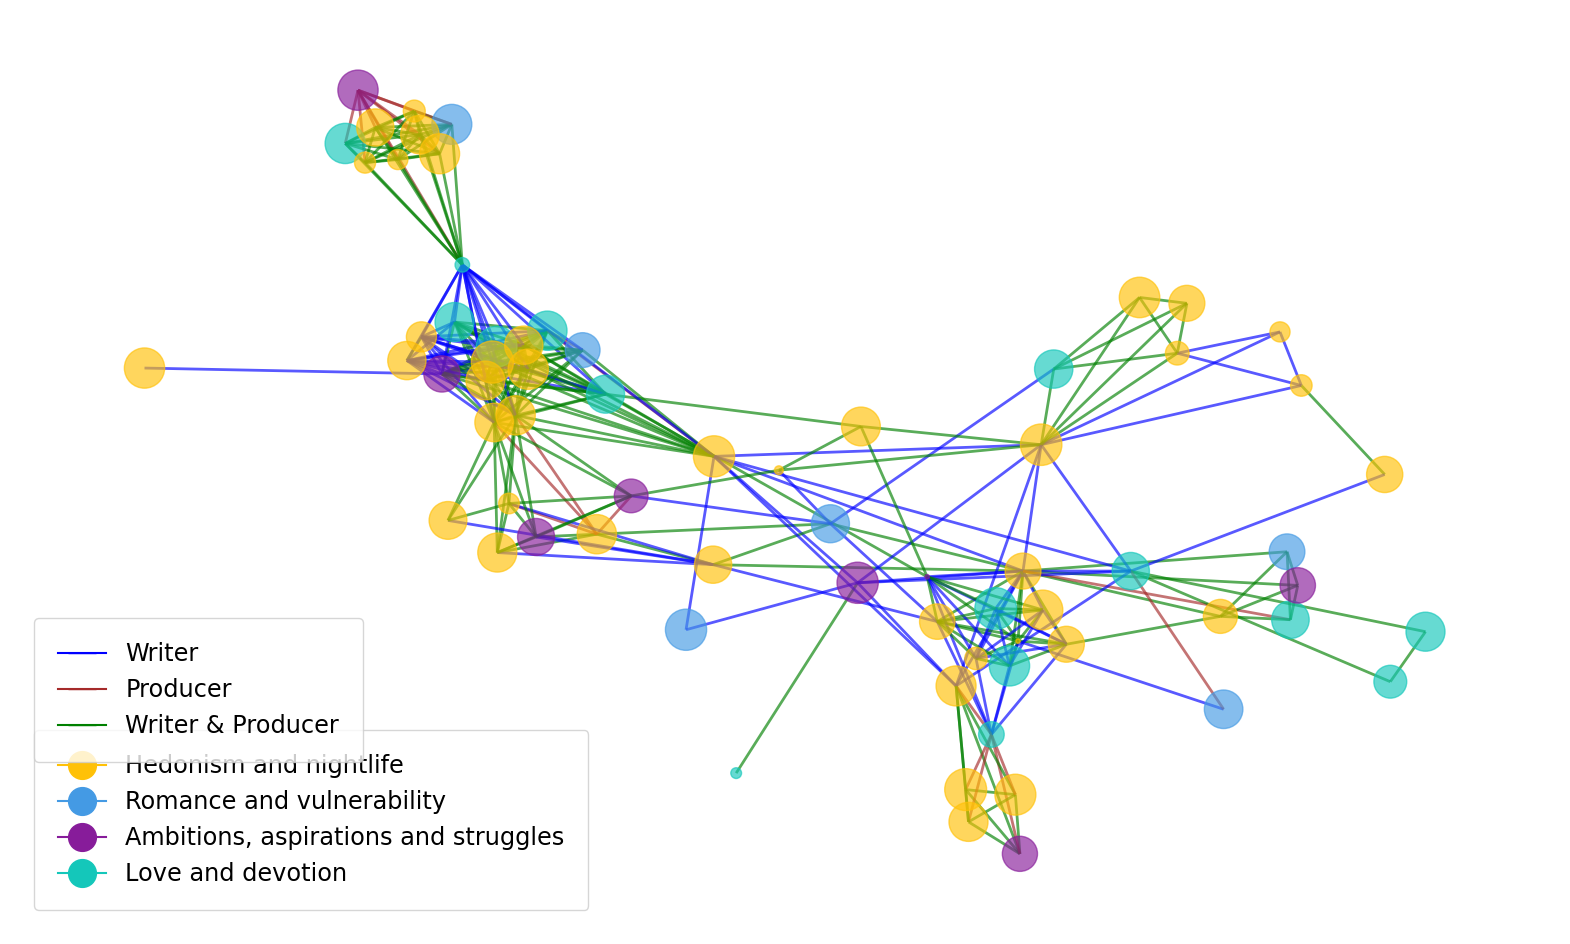

In [123]:
plot_graph(ego,True)

In [70]:
ego_node_ids = list(ego.nodes())
ego_added_tracks= added_tracks.loc[added_tracks['id'].isin(ego_node_ids),:]

##### Odredjivanje mera centralnosti

Shapiro-Wilk test for Degree:
Statistic: 0.9447
p-value: 0.003857817277531388
Not normal

Shapiro-Wilk test for Closeness:
Statistic: 0.8830
p-value: 8.832863695390192e-06
Not normal

Shapiro-Wilk test for Betweenness:
Statistic: 0.4668
p-value: 1.5773485748102434e-14
Not normal

Shapiro-Wilk test for Eigen:
Statistic: 0.6775
p-value: 4.054202290813233e-11
Not normal



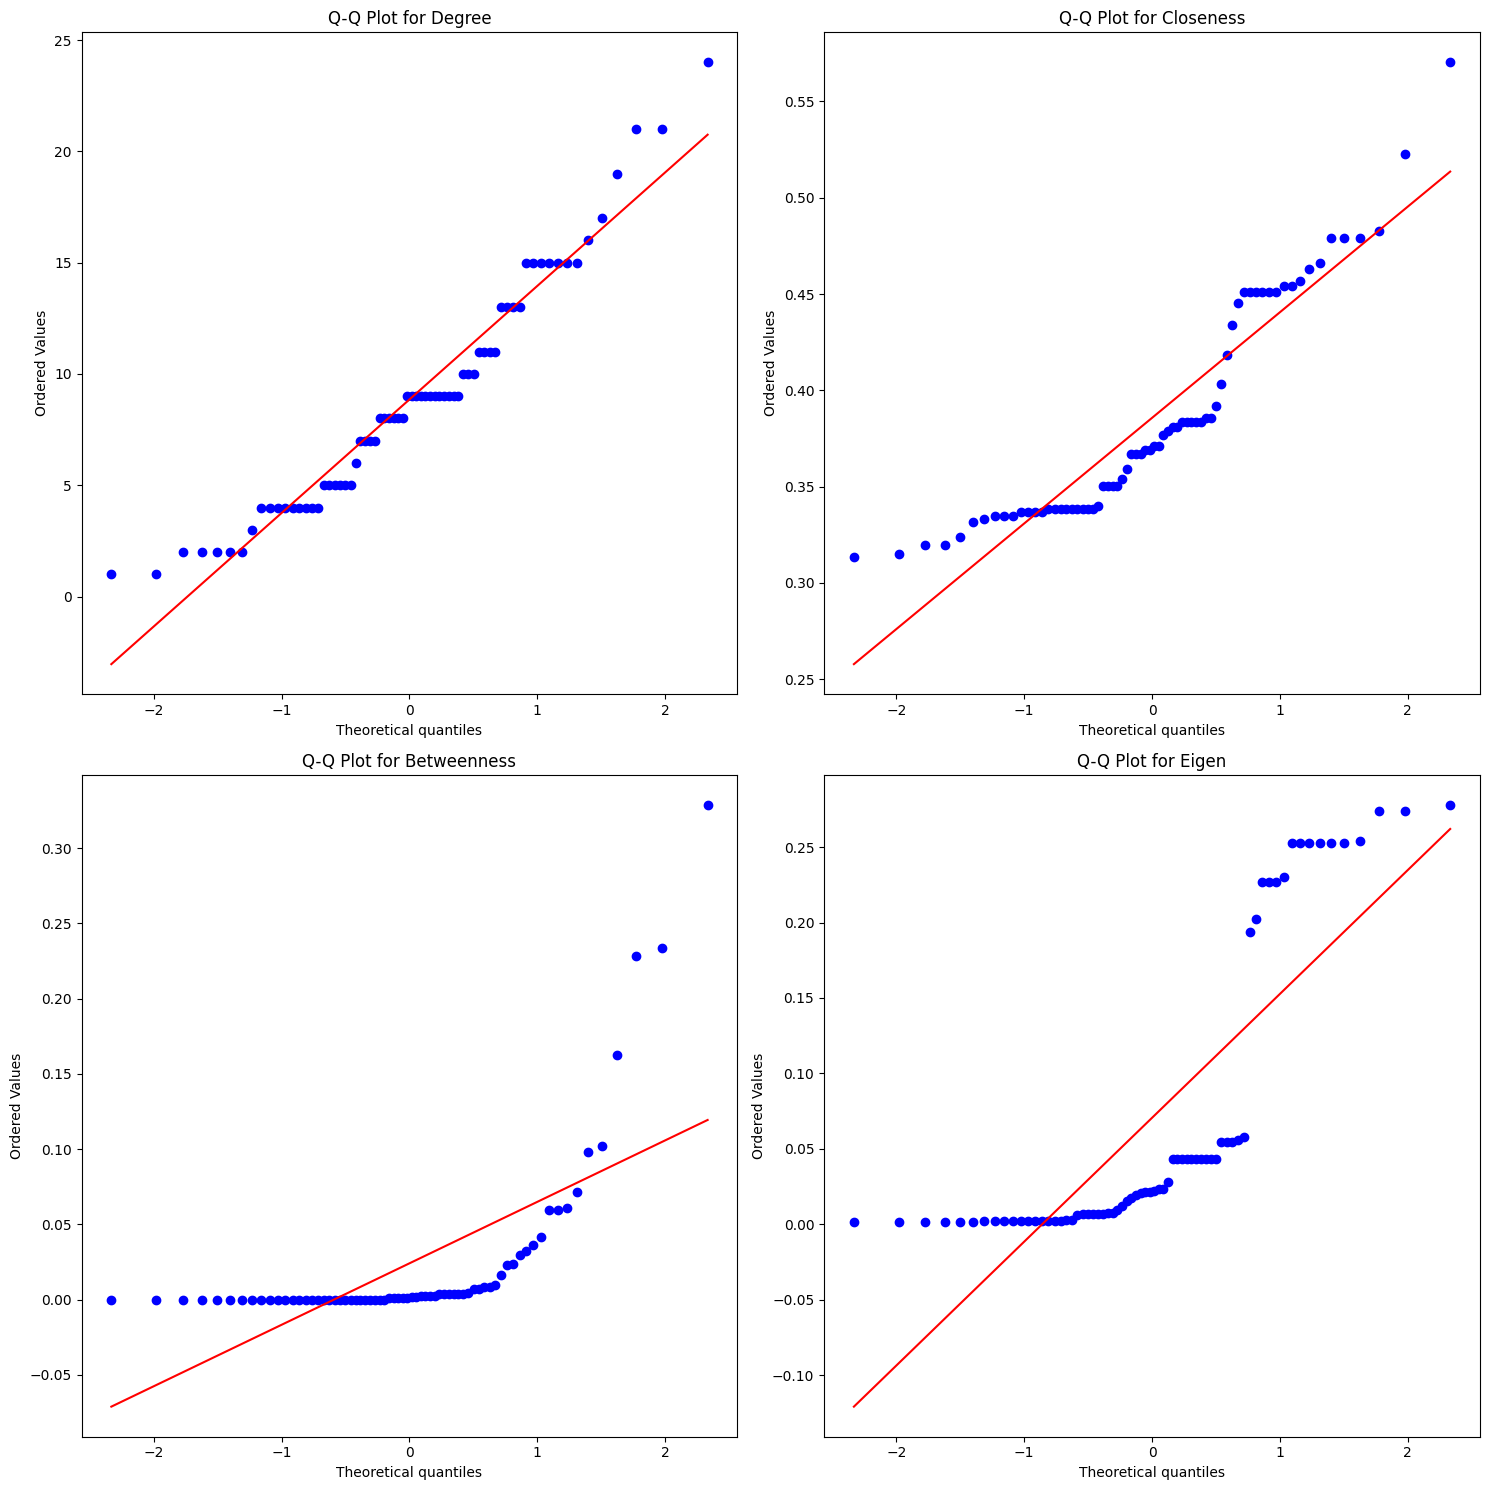

In [71]:
sub_tracks_ego= centrality_measuers(ego_added_tracks, ego)

columns_to_test = ['Degree', 'Closeness', 'Betweenness', 'Eigen']

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.ravel()

# Perform Shapiro-Wilk test on each column
for i, column in enumerate(columns_to_test):
    statistic, p_value = stats.shapiro(sub_tracks_ego[column])
    print(f"Shapiro-Wilk test for {column}:")
    print(f"Statistic: {statistic:.4f}")
    print(f"p-value: {p_value:}")
    print("Normal" if p_value > 0.05 else "Not normal")
    print()

    stats.probplot(sub_tracks_ego[column], dist="norm", plot=axs[i])
    axs[i].set_title(f"Q-Q Plot for {column}")

plt.tight_layout()
plt.show()

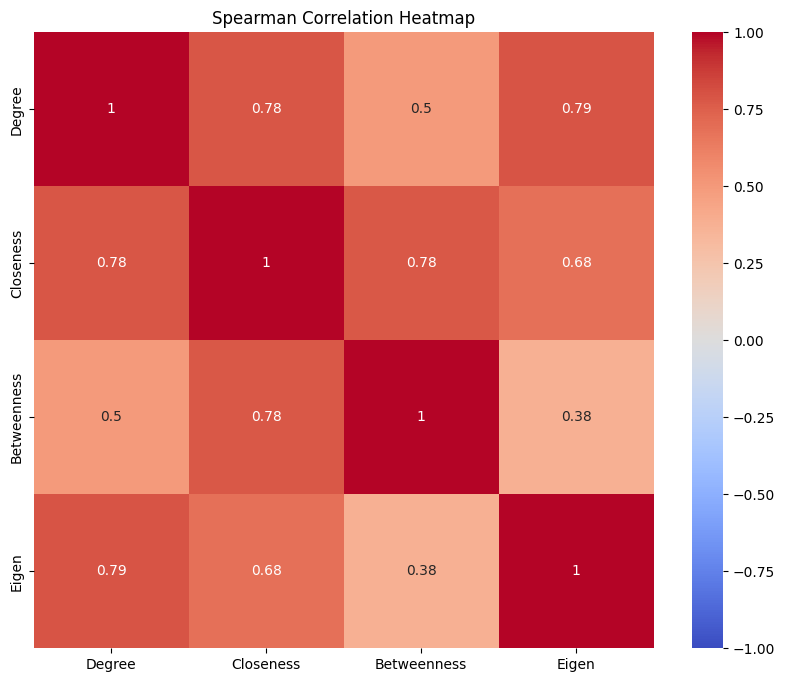

In [72]:
correlation_matrix = sub_tracks_ego.loc[:, "Degree":].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

#####  Putanju do numere koja ima najrazlicitije audio komponente u grafu u odnosu na prosledjenu numeru

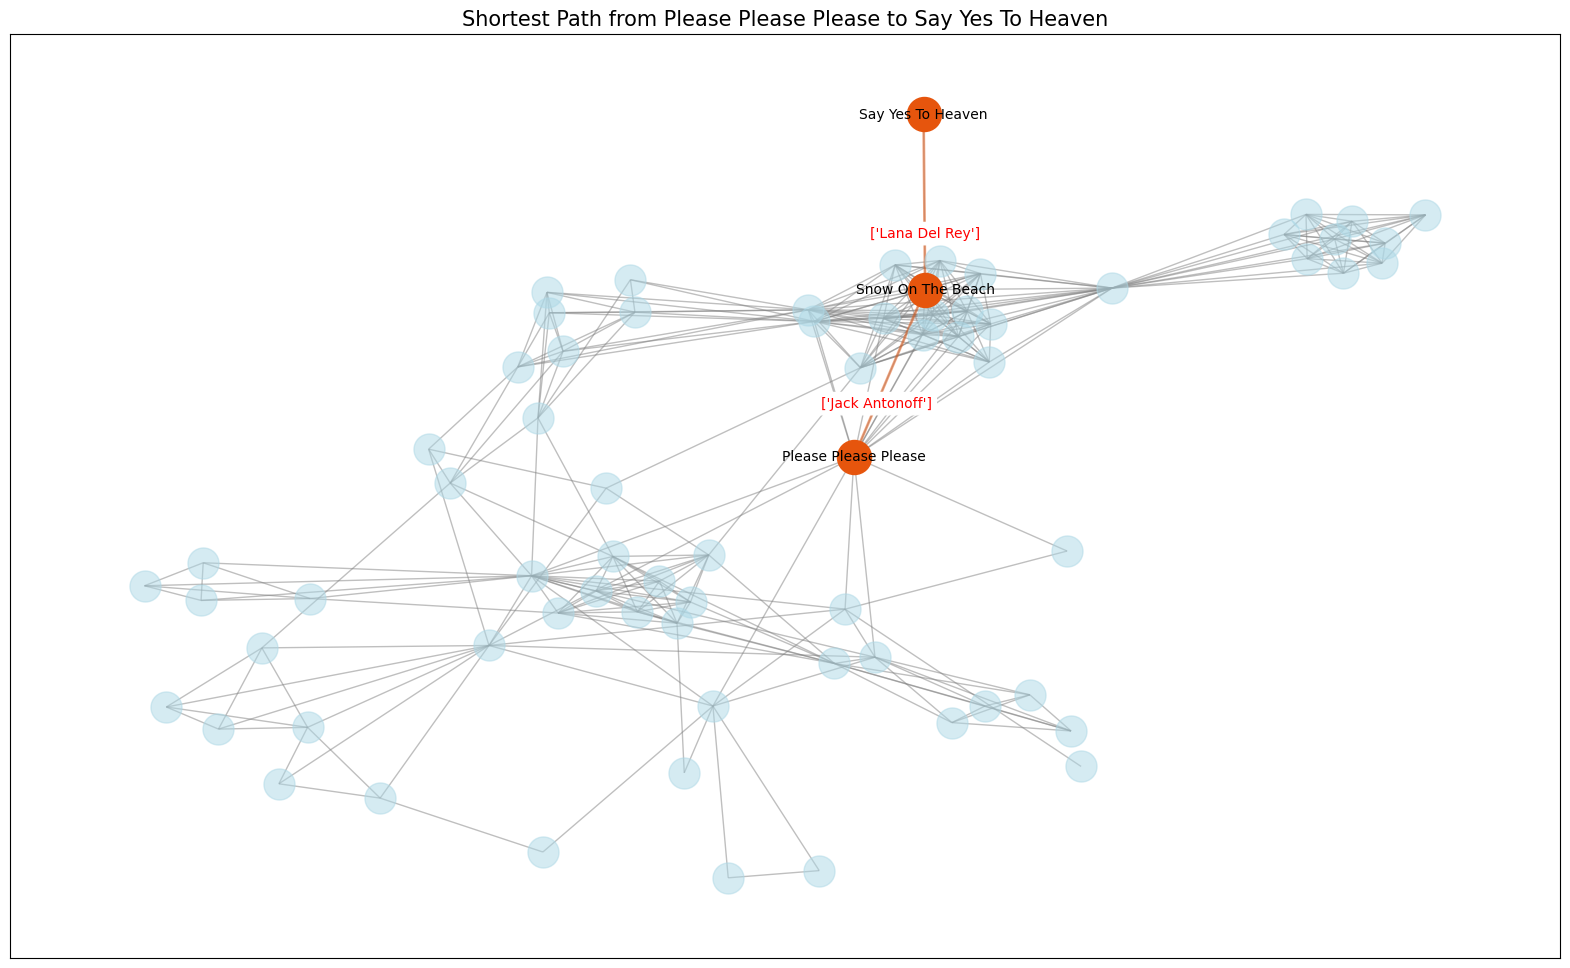

In [73]:
least_similar_node = calculate_euclidian_distance(community_added_tracks, new_tracks, one_song=True, least_similar=True)['id']
plot_graph_with_shortest_path(ego, song_id, least_similar_node)

##### Pronadji putanju do numere koja ima najslicnije audio komponente u grafu

In [74]:
most_similar_node = calculate_euclidian_distance(community_added_tracks, new_tracks, one_song=True, least_similar=False)['id']
print_shortest_path(ego, song_id, most_similar_node)

The furthest distance from Please Please Please is: Anti-Hero

Please Please Please -> ['Jack Antonoff'] -> Anti-Hero
_______________________________________________________


#### Kreiranje plejliste i dodavanje numera
##### Presekom sva tri grafa dobijamo numere su dodate u plejlistu

In [75]:
intersection = pd.merge(community_added_tracks, cluster_added_tracks, on='id').merge(ego_added_tracks, on='id')
# Get the 'id' values from the intersected rows
result_ids = intersection['id'].unique()

In [73]:
user_id = sp.me()['id']
# add tracks to playlist

playlist_name = f'Master thesis playlist - {track_name}'
playlist_description = f'A playlist created using Python and Spotipy based on a song {track_name}'
display(playlist_description)
playlist = sp.user_playlist_create(user_id, playlist_name, public=True, description=playlist_description)

sp.user_playlist_add_tracks(user_id, playlist['id'], result_ids)

'A playlist created using Python and Spotipy based on a song Please Please Please'

{'snapshot_id': 'AAAAAkRxyvnyp7KU9padggiV1Wq9A/KG'}